# **Preparation:**

## 1. Importing Libaries

In [367]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

## 2. Loading Dataset

Loading Dataset and Displaying the top 5 and the last 5 rows of the Dataset

In [368]:
# Load Dataset
df = pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


### **Column Description**

| **Columns Name** | **Column Description**                                   |
| ---------------- | -------------------------------------------------------- |
| **Row ID**       | A unique identifier for each transaction.                |
| **Order ID**     | A unique identifier for each order.                      |
| **Order Date**   | The date when the order was placed.                      |
| **Date Key**     | A numerical representation of the order date (YYYYMMDD). |
| **Contact Name** | The name of the person who placed the order.             |
| **Country**      | The country where the order was placed.                  |
| **City**         | The city where the order was placed.                     |
| **Region**       | The region where the order was placed.                   |
| **Subregion**    | The subregion where the order was placed.                |
| **Customer**     | The name of the company that placed the order.           |
| **Customer ID**  | A unique identifier for each customer.                   |
| **Industry**     | The industry the customer belongs to.                    |
| **Segment**      | The customer segment (SMB, Strategic, Enterprise, etc.). |
| **Product**      | The product was ordered.                                 |
| **License**      | The license key for the product                          |
| **Sales**        | The total sales amount for the transaction.              |
| **Quantity**     | The total number of items in the transaction             |
| **Discount**     | The discount applied to the transaction.                 |
| **Profit**       | The profit from the transaction.                         |

# Data Understanding and Data Cleaning

Before cleaning the data, we must first understand the data first so we can manage and manipulate the data correctly

In [369]:
# Number of Row and Column

a,b = df.shape
print(f'Number of Rows are {a} and Columns are {b}')

Number of Rows are 9994 and Columns are 19


Checking the datatype and missing data/row for its column in the Daset

In [370]:
# Check data type in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Change **'Order Date'** data type to **datetime**

In [371]:
# Changing 'Order Date' to DateTime
df['Order Date'] = pd.to_datetime(df['Order Date'])

Change **'Customer ID'** data type to **string** 

In [372]:
# Changing 'Customer ID' to String
df['Customer ID'] = df['Customer ID'].astype(str)

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

### Show Descriptive Statistics for Selected Columns

In [374]:
display(df.describe(), df.describe(include = 'object'))

,Row ID,Order Date,Date Key,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,623.245101,2.225110,0.206452,234.260108


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


## Unique Value

In [375]:
pd.set_option('display.max_colwidth', None)

def unique_data(df):

    data_unique = pd.DataFrame()
    data_unique['Column'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique Value'] = [df[col].unique() for col in (df.columns)]
    return data_unique

unique_data(df)

,Column,Unique Count,Unique Value
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 

## Missing Value

Checking missing value if there is any in the Dataset

In [376]:
# Percentage of Missing Values in each column
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Counting null values and its pecentage from total data

In [377]:
# Creating Missing Values DataFrame
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])

# Creating Missing Values Percentage Column
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values.sort_values(by = 'Percentage', ascending = False).reset_index()

,index,Total Null Values,Percentage
0,Row ID,0,0.0
1,Order ID,0,0.0
2,Order Date,0,0.0
3,Date Key,0,0.0
4,Contact Name,0,0.0
5,Country,0,0.0
6,City,0,0.0
7,Region,0,0.0
8,Subregion,0,0.0
9,Customer,0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

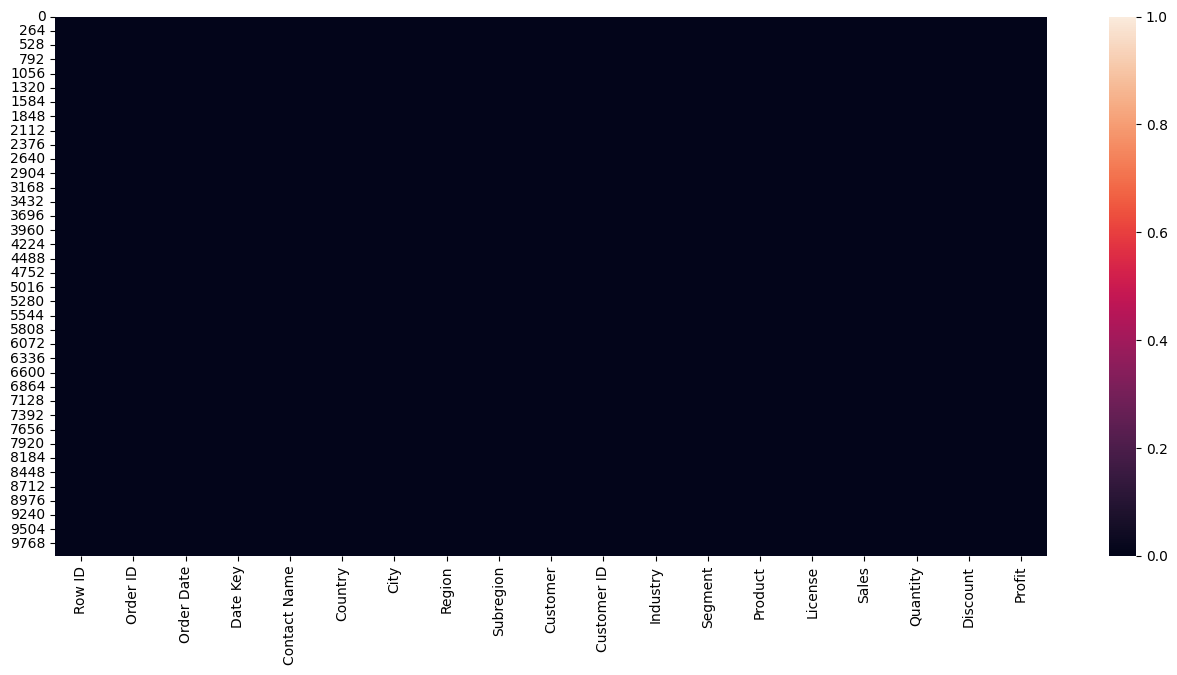

In [378]:
# Heatmap Missing Values

plt.figure(figsize = (16, 7))
sns.heatmap(data = df.isna(), vmin = 0, vmax = 1)
plt.show

## Duplicated Data

In [379]:
# Cheching any Dupliacte in each Column
df[df.duplicated(keep = False)]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [380]:
df[df['Order ID'].duplicated(keep=False)].head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694


In [381]:
df[df['Order ID'].duplicated(keep=False)].tail()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9987,9988,EMEA-2023-163629,2023-11-18,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Data Smasher,GGI2WZG0KP,79.990,1,0.0,28.7964
9988,9989,EMEA-2023-163629,2023-11-18,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Site Analytics,TFALA50KPS,206.100,5,0.0,55.6470
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200


## Whitespace

In [382]:
# Define a function to detect excessive whitespace (leading, trailing, or consecutive spaces)
def has_excessive_whitespace(x):
    if isinstance(x, str):  # Check if x is a string
        return x != x.strip() or '  ' in x
    return False  # Return False if x is not a string

# Apply the function to each column and count excessive whitespace rows per column
whitespace_counts = {
    'Name of Column': [],
    'Count of Whitespace Data': []
}

for column in df.columns:
    # Count rows with excessive whitespace in the current column
    count_whitespace = df[column].apply(has_excessive_whitespace).sum()
    whitespace_counts['Name of Column'].append(column)
    whitespace_counts['Count of Whitespace Data'].append(count_whitespace)

# Convert results to a DataFrame
whitespace_counts_df = pd.DataFrame(whitespace_counts)
whitespace_counts_df
#print("\nDataFrame with whitespace counts per column:\n", whitespace_counts_df)

,Name of Column,Count of Whitespace Data
0,Row ID,0
1,Order ID,0
2,Order Date,0
3,Date Key,0
4,Contact Name,0
5,Country,0
6,City,0
7,Region,0
8,Subregion,0
9,Customer,0


## Outliers

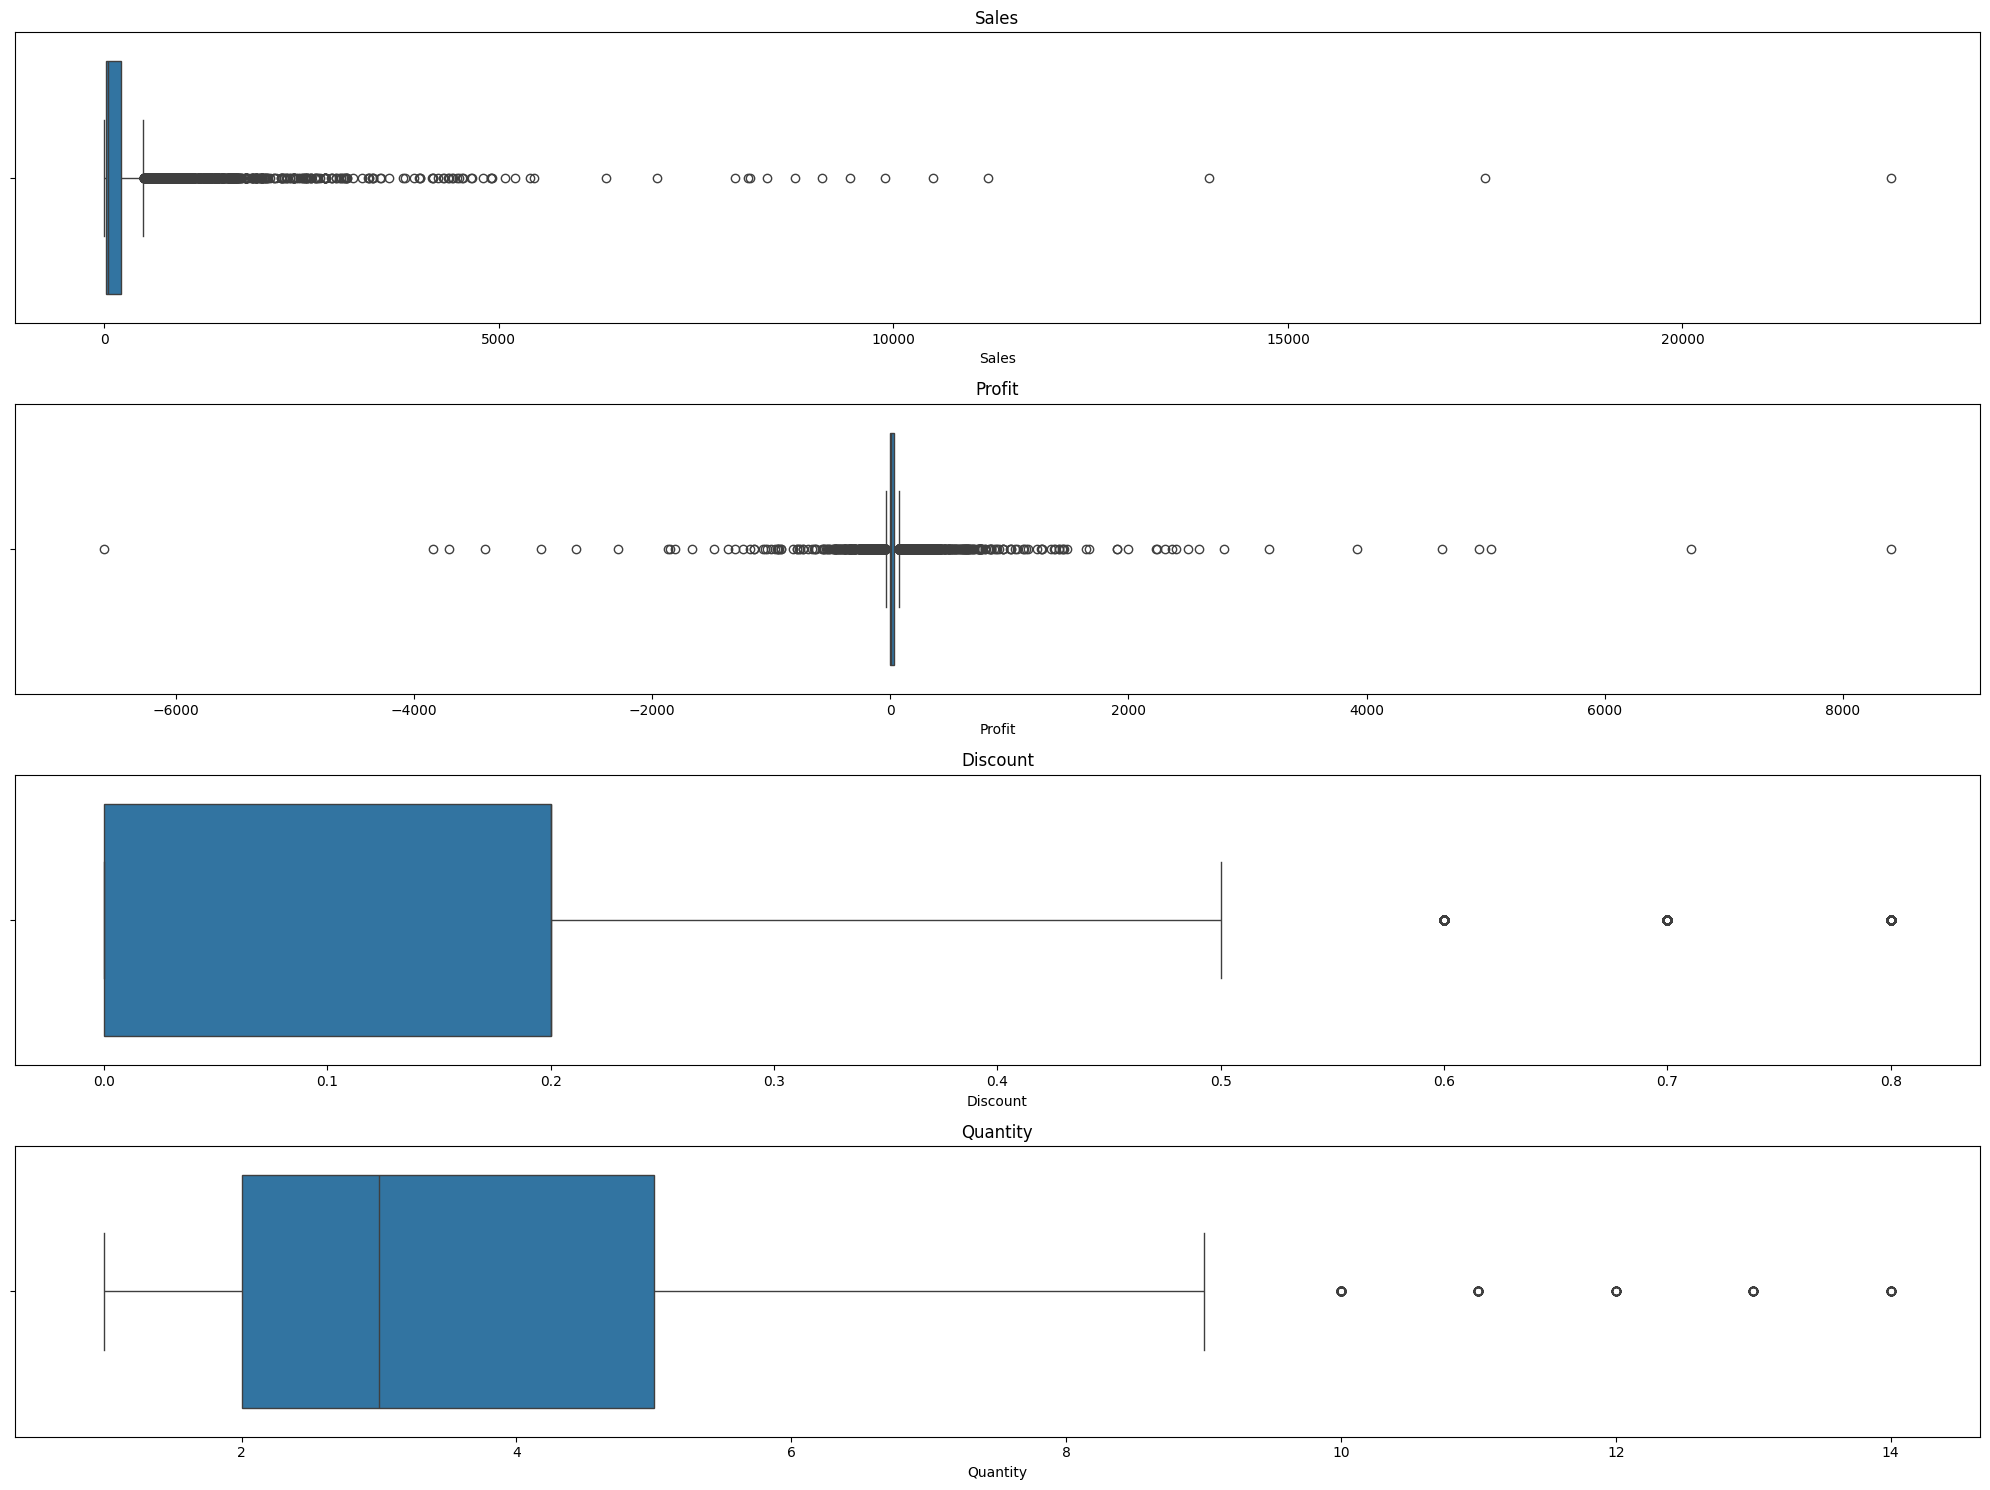

In [383]:
# Outliers
# Present Outliers with Box plot
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(20, 15))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [384]:
# Showing descriptive statistics for 'Sales', 'Discount', 'Profit', and 'Quantity' columns
df[['Sales', 'Discount', 'Profit', 'Quantity']].describe()


,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


In [385]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [386]:
from tabulate import tabulate

In [387]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [388]:
import jinja2

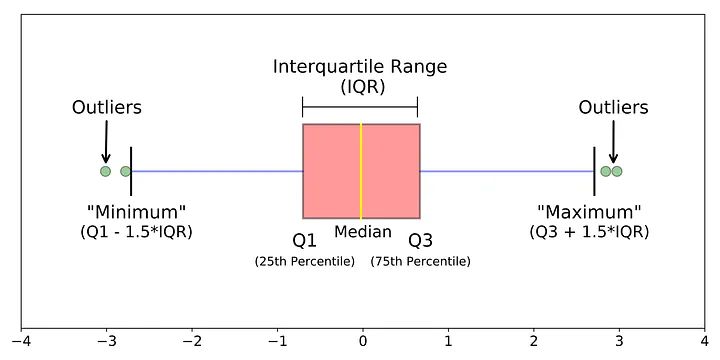

In [389]:
# Initialize an empty dictionary to store the results
outlier_summary = {'Column': [], 'Minimum': [], 'Maximum': [], 'Number of Outliers': []}

# Loop through each column to calculate outlier bounds and count
for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    Minimum = Q1 - 1.5 * IQR
    Maximum = Q3 + 1.5 * IQR
    
    # Count outliers in the column
    outliers = df[(df[column] < Minimum) | (df[column] > Maximum)]
    outlier_count = outliers.shape[0]
    
    # Append results to the summary dictionary
    outlier_summary['Column'].append(column)
    outlier_summary['Minimum'].append(Minimum)
    outlier_summary['Maximum'].append(Maximum)
    outlier_summary['Number of Outliers'].append(outlier_count)

# Convert the summary dictionary to a DataFrame for a clean display
outlier_summary_df = pd.DataFrame(outlier_summary)
outlier_summary_df.set_index('Column', inplace=True)

# Display the summary DataFrame
outlier_table = outlier_summary_df.style.format('{:.2f}')
outlier_table

,Minimum,Maximum,Number of Outliers
Column,,,
Sales,-271.71,498.93,1167.00
Quantity,-2.50,9.50,170.00
Discount,-0.30,0.50,856.00
Profit,-39.72,70.82,1881.00


## Anomaly Data:

## a. Sales, Quantity. and Discount

### **1. Sales**

In [390]:
# Calculate Lowest and Highest Sales
low_sales = df['Sales'].min()
high_sales = df['Sales'].max()

# Making DataFrame Table of Lowest and Highest Sales with currency format
sales_info = pd.DataFrame({'Lowest Sales': [low_sales], 'Highest Sales': [high_sales]})
sales_info['Lowest Sales'] = sales_info['Lowest Sales'].apply(lambda x: f'${x:,.2f}')
sales_info['Highest Sales'] = sales_info['Highest Sales'].apply(lambda x: f'${x:,.2f}')

sales_info

,Lowest Sales,Highest Sales
0,$0.44,"$22,638.48"


- **It is already correct**. There is no negative value in Lowest Sales and Highest Sales

In [391]:
# Making DataFrame Groupby Sales
smallest_sales = df.groupby('Sales').agg({'Profit': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=True).reset_index()

# Calculating parameters such as Sales and Total Profit
sales = smallest_sales['Sales']
total_profit = smallest_sales['Profit'].sum()

# Formatting all Columns
smallest_sales['Sales'] = smallest_sales['Sales'].apply(lambda x: f'${x:,.2f}')
smallest_sales['Profit'] = smallest_sales['Profit'].round(2)
smallest_sales['Profit Margin'] = ((smallest_sales['Profit'] / sales) * 100 ).round(2).astype(str)+'%'
smallest_sales['Profit Contribution to Total Profit'] = ((smallest_sales['Profit'] / total_profit) * 100 ).round(2).astype(str)+'%'
smallest_sales['Quantity'] = smallest_sales['Quantity'].apply(lambda x: f'{x} pcs')

smallest_sales.head(10)

,Sales,Profit,Quantity,Profit Margin,Profit Contribution to Total Profit
0,$0.44,-1.11,1 pcs,-250.0%,-0.0%
1,$0.56,-0.95,1 pcs,-170.86%,-0.0%
2,$0.84,-1.34,1 pcs,-160.29%,-0.0%
3,$0.85,-0.60,1 pcs,-70.42%,-0.0%
4,$0.88,-1.40,1 pcs,-159.82%,-0.0%
5,$0.90,-1.57,1 pcs,-174.83%,-0.0%
6,$0.98,-1.48,2 pcs,-150.41%,-0.0%
7,$0.99,0.44,1 pcs,44.44%,0.0%
8,$1.04,-1.83,1 pcs,-175.29%,-0.0%
9,$1.08,-3.31,7 pcs,-306.48%,-0.0%


In [392]:
smallest_sales.tail(10)

,Sales,Profit,Quantity,Profit Margin,Profit Contribution to Total Profit
5815,"$8,399.98",1120.00,4 pcs,13.33%,0.39%
5816,"$8,749.95",2799.98,5 pcs,32.0%,0.98%
5817,"$9,099.93",2365.98,7 pcs,26.0%,0.83%
5818,"$9,449.95",4630.48,5 pcs,49.0%,1.62%
5819,"$9,892.74",4946.37,13 pcs,50.0%,1.73%
5820,"$10,499.97",5039.99,3 pcs,48.0%,1.76%
5821,"$11,199.97",3919.99,4 pcs,35.0%,1.37%
5822,"$13,999.96",6719.98,4 pcs,48.0%,2.35%
5823,"$17,499.95",8399.98,5 pcs,48.0%,2.93%
5824,"$22,638.48",-1811.08,6 pcs,-8.0%,-0.63%


- Some products are sold in loss,  so the profit is minus. Which is the low price product. Their profits contribute very low to the Total Profit
- Expensive product tend to sold in profit with higher profit margin, except the most expensive or the last one **($22,638.48)**
- Their profits contribute relatively high to the Total Profit
- **The data already logic and valid**

### **2. Discount**

In [393]:
# Calculate Lowest and Highest Discount
low_Discount = df['Discount'].min() * 100
high_Discount = df['Discount'].max() * 100

# Making DataFrame Table of Lowest and Highest Discount with percentage format
Discount_info = pd.DataFrame({'Lowest Discount': [low_Discount], 'Highest Discount': [high_Discount]})
Discount_info['Lowest Discount'] = Discount_info['Lowest Discount'].apply(lambda x: f'{x:,.2f}%')
Discount_info['Highest Discount'] = Discount_info['Highest Discount'].apply(lambda x: f'{x:,.2f}%')

Discount_info

,Lowest Discount,Highest Discount
0,0.00%,80.00%


- **It is already correct**. There is no negative value in Lowest Discount and Highest Discount

In [394]:
# Making DataFrame Groupby Sales
smallest_Discount = df.groupby('Discount').agg({'Profit': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Discount', ascending=True).reset_index()

# Calculating parameters such as Sales and Total Profit
total_profit = smallest_Discount['Profit'].sum()

# Formatting all Columns
smallest_Discount['Discount'] = (smallest_Discount['Discount']* 100 ).round(2).astype(str)+'%'
smallest_Discount['Profit'] = smallest_Discount['Profit'].round(2)
smallest_Discount['Profit Contribution to Total Profit'] = ((smallest_Discount['Profit'] / total_profit) * 100 ).round(2).astype(str)+'%'
smallest_Discount['Quantity'] = smallest_Discount['Quantity'].apply(lambda x: f'{x} pcs')
smallest_Discount['Sales'] = smallest_Discount['Sales'].apply(lambda x: f'${x:,.2f}')

smallest_Discount

,Discount,Profit,Quantity,Sales,Profit Contribution to Total Profit
0,0.0%,320987.60,18267 pcs,"$1,087,908.47",112.08%
1,10.0%,9029.18,373 pcs,"$54,369.35",3.15%
2,15.0%,1418.99,198 pcs,"$27,558.52",0.5%
3,20.0%,90337.31,13660 pcs,"$764,594.37",31.54%
4,30.0%,-10369.28,849 pcs,"$103,226.65",-3.62%
5,32.0%,-2391.14,105 pcs,"$14,493.46",-0.83%
6,40.0%,-23057.05,786 pcs,"$116,417.78",-8.05%
7,45.0%,-2493.11,45 pcs,"$5,484.97",-0.87%
8,50.0%,-20506.43,241 pcs,"$58,918.54",-7.16%
9,60.0%,-5944.66,501 pcs,"$6,644.70",-2.08%


- **There is no Anomaly in here**. Lower Discount tends to make Higher Profit and Higher Discount tends to make Lower Profit even Loss

### **3. Profit**

In [395]:
# Calculate Lowest and Highest Profit
low_Profit = df['Profit'].min()
high_Profit = df['Profit'].max()

# Making DataFrame Table of Lowest and Highest Profit with currency format
Profit_info = pd.DataFrame({'Lowest Profit': [low_Profit], 'Highest Profit': [high_Profit]})
Profit_info['Lowest Profit'] = Profit_info['Lowest Profit'].apply(lambda x: f'${x:,.2f}')
Profit_info['Highest Profit'] = Profit_info['Highest Profit'].apply(lambda x: f'${x:,.2f}')

Profit_info

,Lowest Profit,Highest Profit
0,"$-6,599.98","$8,399.98"


- There is negative value in Profit because It is Company Loss. **It is Valid**

In [396]:
# Making DataFrame Groupby Sales
smallest_Profit = df.groupby('Profit').agg({'Discount': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Profit', ascending=True).reset_index()

# Calculating parameters such as Sales and Total Profit
total_profit = smallest_Profit['Profit'].sum()

# Formatting all Columns
smallest_Profit['Discount'] = (smallest_Profit['Discount']* 100 ).round(2).astype(str)+'%'
smallest_Profit['Profit'] = smallest_Profit['Profit'].round(2)
smallest_Profit['Profit Contribution to Total Profit'] = ((smallest_Profit['Profit'] / total_profit) * 100 ).round(2).astype(str)+'%'
smallest_Profit['Quantity'] = smallest_Profit['Quantity'].apply(lambda x: f'{x} pcs')
smallest_Profit['Sales'] = smallest_Profit['Sales'].apply(lambda x: f'${x:,.2f}')

smallest_Profit

,Profit,Discount,Quantity,Sales,Profit Contribution to Total Profit
0,-6599.98,70.0%,5 pcs,"$4,499.98",-2.97%
1,-3839.99,50.0%,4 pcs,"$7,999.98",-1.73%
2,-3701.89,80.0%,8 pcs,"$2,177.58",-1.67%
3,-3399.98,70.0%,5 pcs,"$2,549.99",-1.53%
4,-2929.48,80.0%,5 pcs,"$1,889.99",-1.32%
...,...,...,...,...,...
7282,4630.48,0.0%,5 pcs,"$9,449.95",2.08%
7283,4946.37,0.0%,13 pcs,"$9,892.74",2.23%
7284,5039.99,0.0%,3 pcs,"$10,499.97",2.27%
7285,6719.98,0.0%,4 pcs,"$13,999.96",3.02%


- Lower Profit (Loss) on Higher Discount and Higher Profit on Lower Discount
- **It is Reasonable** 

### **4. Quantity**

In [397]:
# Calculate Lowest and Highest Quantity
low_Quantity = df['Quantity'].min()
high_Quantity = df['Quantity'].max()

# Making DataFrame Table of Lowest and Highest Quantity with currency format
Quantity_info = pd.DataFrame({'Lowest Quantity': [low_Quantity], 'Highest Quantity': [high_Quantity]})
Quantity_info['Lowest Quantity'] = Quantity_info['Lowest Quantity'].astype(int).astype(str) + ' pcs'
Quantity_info['Highest Quantity'] = Quantity_info['Highest Quantity'].astype(int).astype(str) + ' pcs'

Quantity_info

,Lowest Quantity,Highest Quantity
0,1 pcs,14 pcs


- There is no negative value in Quantity. **It is Valid**

## b. Country, Region, Sub-region, and City

In [398]:
# Check unique countries groupby Region ans SUbregion
region_groupby = df.groupby(['Region', 'Subregion'])['Country'].unique().reset_index()
region_groupby

,Region,Subregion,Country
0,AMER,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,AMER,NAMER,"[United States, Canada]"
2,APJ,ANZ,"[Australia, New Zealand]"
3,APJ,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
4,APJ,IND,[India]
5,APJ,JAPN,[Japan]
6,EMEA,EU,[Italy]
7,EMEA,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
8,EMEA,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
9,EMEA,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"


In [399]:
count_city_country = df.groupby('Country')['City'].count().reset_index()
count_city_country

,Country,City
0,Argentina,130
1,Australia,492
2,Austria,10
3,Belgium,124
4,Brazil,255
5,Canada,506
6,Chile,224
7,China,105
8,Colombia,42
9,Costa Rica,38


In [400]:
city_country = df.groupby('Country')['City'].unique().reset_index()
city_country

,Country,City
0,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbourne, Adelaide, Brisbane, Hobart, Gold Coast, Perth]"
2,Austria,[Vienna]
3,Belgium,"[Brussels, Antwerp, Ghent]"
4,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, Belo Horizonte, Brasília]"
5,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montreal, Calgary, Quebec, Regina, Winnipeg, Victoria]"
6,Chile,"[Puente Alto, Santiago, Antofagasta]"
7,China,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianjin, Suzhou, Chengdu]"
8,Colombia,"[Bogotá, Medellín, Cali]"
9,Costa Rica,[San José]


## c. Industry, Segment, and Product

In [401]:
df.groupby(['Industry', 'Segment'])['Product'].unique().reset_index()

,Industry,Segment,Product
0,Communications,Enterprise,"[Data Smasher, ContactMatcher, Support, SaaS Connector Pack, Site Analytics, ChatBot Plugin, SaaS Connector Pack - Gold, FinanceHub, Big Ol Database, Marketing Suite - Gold, OneView, Storage, Marketing Suite]"
1,Communications,SMB,"[ChatBot Plugin, Marketing Suite - Gold, OneView, ContactMatcher, Data Smasher, Support, SaaS Connector Pack - Gold, FinanceHub, SaaS Connector Pack, Storage, Big Ol Database, Site Analytics, Marketing Suite]"
2,Communications,Strategic,"[ContactMatcher, OneView, Support, ChatBot Plugin, Big Ol Database, SaaS Connector Pack, SaaS Connector Pack - Gold, Marketing Suite - Gold, Site Analytics, Storage, FinanceHub, Data Smasher, Marketing Suite]"
3,Consumer Products,Enterprise,"[Support, Data Smasher, ContactMatcher, SaaS Connector Pack, FinanceHub, Marketing Suite - Gold, ChatBot Plugin, OneView, Site Analytics, SaaS Connector Pack - Gold, Big Ol Database, Alchemy, Storage]"
4,Consumer Products,SMB,"[ContactMatcher, Data Smasher, Support, SaaS Connector Pack, SaaS Connector Pack - Gold, ChatBot Plugin, Marketing Suite, Marketing Suite - Gold, Site Analytics, OneView, FinanceHub, Storage, Big Ol Database, Alchemy]"
5,Consumer Products,Strategic,"[Site Analytics, SaaS Connector Pack, OneView, ContactMatcher, FinanceHub, Marketing Suite, Big Ol Database, Data Smasher, Support, ChatBot Plugin, SaaS Connector Pack - Gold, Marketing Suite - Gold, Storage, Alchemy]"
6,Energy,Enterprise,"[Marketing Suite - Gold, ContactMatcher, SaaS Connector Pack, Data Smasher, Site Analytics, ChatBot Plugin, FinanceHub, Support, OneView, Storage, Marketing Suite, SaaS Connector Pack - Gold, Alchemy, Big Ol Database]"
7,Energy,SMB,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, Support, Storage, SaaS Connector Pack, Big Ol Database, ChatBot Plugin, Site Analytics, Data Smasher, SaaS Connector Pack - Gold, OneView]"
8,Energy,Strategic,"[FinanceHub, Site Analytics, ContactMatcher, Support, Marketing Suite - Gold, OneView, ChatBot Plugin, Data Smasher, SaaS Connector Pack, Alchemy, Big Ol Database, SaaS Connector Pack - Gold, Storage, Marketing Suite]"
9,Finance,Enterprise,"[SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Site Analytics, Marketing Suite - Gold, SaaS Connector Pack, ContactMatcher, ChatBot Plugin, Big Ol Database, Data Smasher, Support, OneView, Storage, Alchemy]"


In [402]:
df.groupby(['Industry'])['Product'].unique().reset_index()

,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, OneView, Data Smasher, ContactMatcher, Support, Big Ol Database, SaaS Connector Pack, SaaS Connector Pack - Gold, FinanceHub, Site Analytics, Storage, Marketing Suite]"
1,Consumer Products,"[ContactMatcher, Site Analytics, SaaS Connector Pack, Data Smasher, Support, OneView, SaaS Connector Pack - Gold, ChatBot Plugin, FinanceHub, Marketing Suite, Big Ol Database, Marketing Suite - Gold, Storage, Alchemy]"
2,Energy,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, Support, Site Analytics, OneView, Storage, SaaS Connector Pack, Big Ol Database, ChatBot Plugin, Data Smasher, Alchemy, SaaS Connector Pack - Gold]"
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, Site Analytics, ContactMatcher, OneView, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Marketing Suite - Gold, Data Smasher, Support, Storage, Big Ol Database, Alchemy]"
4,Healthcare,"[OneView, ContactMatcher, FinanceHub, SaaS Connector Pack, Marketing Suite - Gold, SaaS Connector Pack - Gold, Site Analytics, Data Smasher, Support, Storage, Alchemy, ChatBot Plugin, Marketing Suite, Big Ol Database]"
5,Manufacturing,"[Marketing Suite - Gold, ContactMatcher, Data Smasher, FinanceHub, SaaS Connector Pack, Support, OneView, Storage, Marketing Suite, ChatBot Plugin, Site Analytics, Big Ol Database, SaaS Connector Pack - Gold, Alchemy]"
6,Misc,"[Support, OneView, Data Smasher, SaaS Connector Pack, ContactMatcher, SaaS Connector Pack - Gold, ChatBot Plugin, Site Analytics, Marketing Suite - Gold, FinanceHub, Storage, Big Ol Database, Alchemy, Marketing Suite]"
7,Retail,"[Marketing Suite - Gold, ChatBot Plugin, OneView, FinanceHub, Storage, Site Analytics, ContactMatcher, Data Smasher, SaaS Connector Pack, Support, Big Ol Database, SaaS Connector Pack - Gold, Marketing Suite, Alchemy]"
8,Tech,"[ContactMatcher, Marketing Suite, SaaS Connector Pack, SaaS Connector Pack - Gold, ChatBot Plugin, Marketing Suite - Gold, Data Smasher, Support, FinanceHub, Site Analytics, Storage, Big Ol Database, OneView, Alchemy]"
9,Transportation,"[ContactMatcher, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, FinanceHub, ChatBot Plugin, Site Analytics, Support, Big Ol Database, OneView, Storage, Alchemy, Marketing Suite, SaaS Connector Pack - Gold]"


In [403]:
df.groupby(['Segment'])['Product'].unique().reset_index()

,Segment,Product
0,Enterprise,"[OneView, ContactMatcher, Support, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Site Analytics, Marketing Suite - Gold, SaaS Connector Pack, Data Smasher, ChatBot Plugin, Storage, Big Ol Database, Alchemy]"
1,SMB,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, Site Analytics, OneView, Support, Data Smasher, SaaS Connector Pack - Gold, Storage, Big Ol Database, Alchemy]"
2,Strategic,"[FinanceHub, ChatBot Plugin, OneView, Site Analytics, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, ContactMatcher, Storage, SaaS Connector Pack - Gold, Support, Marketing Suite, Big Ol Database, Alchemy]"


In [404]:
df.groupby(['Segment'])['Industry'].unique().reset_index()

,Segment,Industry
0,Enterprise,"[Healthcare, Misc, Finance, Energy, Retail, Manufacturing, Consumer Products, Transportation, Tech, Communications]"
1,SMB,"[Energy, Finance, Tech, Manufacturing, Retail, Consumer Products, Healthcare, Communications, Transportation, Misc]"
2,Strategic,"[Energy, Retail, Consumer Products, Manufacturing, Tech, Finance, Transportation, Healthcare, Communications, Misc]"


## Statistics Test (In General)

Before conducting data analysis, we do some statistics tests in general to know the **Normality**, **Variability**, and **Correlation** from the Dataset

Specific statistics test or further statistics test is conducted in Data Analysis Section

## a. Normality

Conducting Normality Test to Dataset to know if the Distribution of the Dataset follows Normal Distribution or not

In conducting Normality Test, we use Numerical and Visual Method:

1. **Numerical:** Shapiro-Wilk Test
2. **Visual:** Histogram Distribution and Quantile-Quantile Plot

We're conducting Normality Test to Sales, Profit, Discount, and Quantity Column

### 1. Sales

In [405]:
import scipy.stats as stats

In [406]:
# Perform the Shapiro-Wilk test on 'Sales' column
shapiro_test = stats.shapiro(df['Sales'])

# Create a DataFrame to store the results
shapiro_results_df = pd.DataFrame({
    'Test Statistic': [shapiro_test[0]],
    'p-value': [shapiro_test[1]]
})

# Display the DataFrame
shapiro_results_df

,Test Statistic,p-value
0,0.323327,4.065054e-105


For Sales data, The Shapiro Test Statistic value is **0.323** which is far below 1.0 and 

the p-value is **4.065e-105**  which is also very far below the significance level 0.05.

So, we can conclude that Sales data does not follow a Normal Distribution Numerically

R-squared from Q-Q Plot: 0.3222442752953566


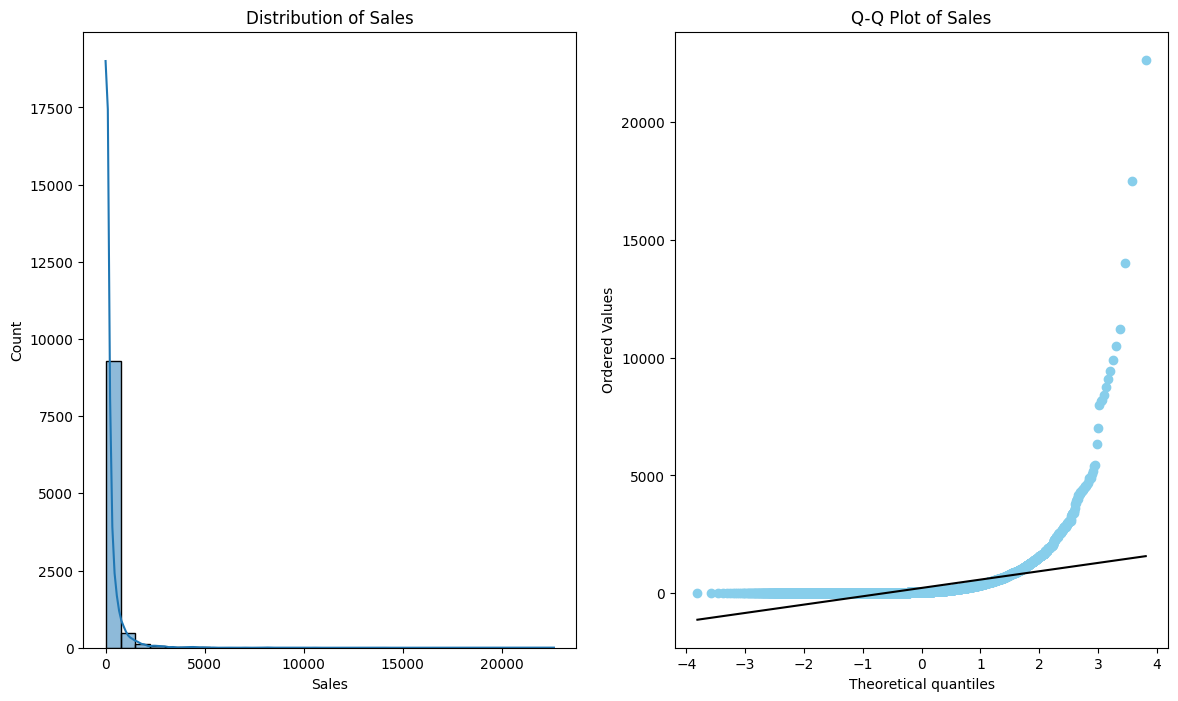

In [407]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Histogram Distribution Plot of Sales
sns.histplot(df['Sales'], bins=30, kde=True, ax=axs[0])

# Quantile-Quantile Q-Q Plot of Sales
osm, (slope, intercept, r) = stats.probplot(df['Sales'], dist="norm", plot=axs[1])

# Extract the R-Squared Value
r_squared = r ** 2
print(f"R-squared from Q-Q Plot: {r_squared}")

# Set titles and colors
axs[0].set_title('Distribution of Sales')
axs[1].set_title('Q-Q Plot of Sales')
lines = axs[1].get_lines()  # Lines for color options
lines[0].set_color('skyblue')
lines[1].set_color('black')


From the figures above, it can be concluded that:
1. Distribution of Sales histogram does not follow a Bell Curve and Right-Skewed. So it is not a Normal Distribution
2. In Quantile-Quantile Plot or Q-Q Plot, the data does not lie on or near the straight black line. The Data deviates so much upward.
 So it is not a Normal Distribution

In conclusion, Sales Data **is not a Normal Distribution** visually

### 2. Profit

In [408]:
# Perform the Shapiro-Wilk test on 'Profit' column
shapiro_test = stats.shapiro(df['Profit'])

# Create a DataFrame to store the results
shapiro_results_df = pd.DataFrame({
    'Test Statistic': [shapiro_test[0]],
    'p-value': [shapiro_test[1]]
})

# Display the DataFrame
shapiro_results_df

,Test Statistic,p-value
0,0.257097,1.698786e-107


For Profit data, The Shapiro Test Statistic value is **0.257** which is far below 1.0 and 

the p-value is **1.698e-107**  which is also very far below the significance level 0.05.

So, we can conclude that Profit data does not follow a Normal Distribution Numerically

R-squared from Q-Q plot: 0.2553037558177154


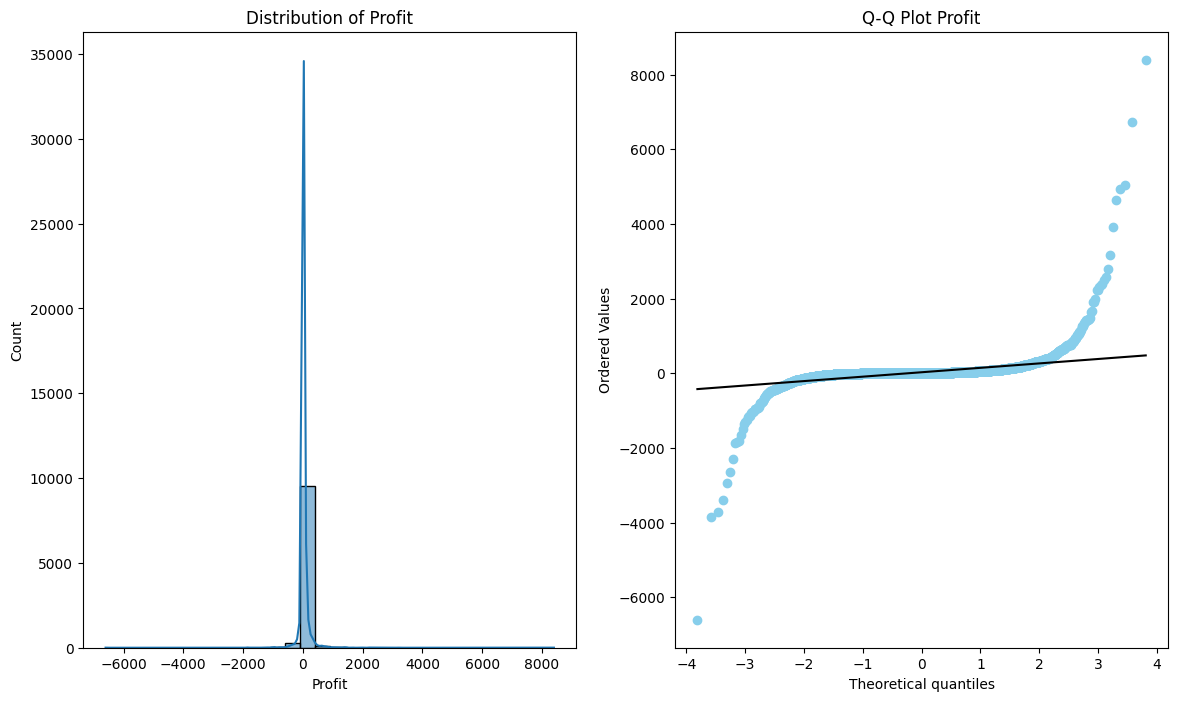

In [409]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Histogram Distribution Plot of Profit
sns.histplot(df['Profit'], bins=30, kde=True, ax=axs[0])

# Quantile-Quantile Q-Q Plot of Profit
osm, (slope, intercept, r) = stats.probplot(df['Profit'], dist="norm", plot=axs[1])

# Extract the R-Squared Value
r_squared = r ** 2
print(f"R-squared from Q-Q plot: {r_squared}")

# Set titles and colors
axs[0].set_title('Distribution of Profit')
axs[1].set_title('Q-Q Plot Profit')
lines = axs[1].get_lines()  # Lines for color options
lines[0].set_color('skyblue')
lines[1].set_color('black')


From the figures above, it can be concluded that:
1. Distribution of Profit histogram does not follow a Bell Curve and Hihly-Skewed upward. So it is not a Normal Distribution
2. In Quantile-Quantile Plot or Q-Q Plot, the data does not lie on or near the straight black line. The Data deviates so much upward and downward in each tail.
 So it is not a Normal Distribution

In conclusion, Profit Data **is not a Normal Distribution** visually

### 3. Discount

In [410]:
# Perform the Shapiro-Wilk test on 'Discount' column
shapiro_test = stats.shapiro(df['Discount'])

# Create a DataFrame to store the results
shapiro_results_df = pd.DataFrame({
    'Test Statistic': [shapiro_test[0]],
    'p-value': [shapiro_test[1]]
})

# Display the DataFrame
shapiro_results_df

,Test Statistic,p-value
0,0.710706,1.030847e-84


For Discount data, The Shapiro Test Statistic value is **0.710** which is far below 1.0 and 

the p-value is **1.030e-84**  which is also very far below the significance level 0.05.

So, we can conclude that Discount data does not follow a Normal Distribution Numerically

R-squared from Q-Q plot: 0.7108487781808186


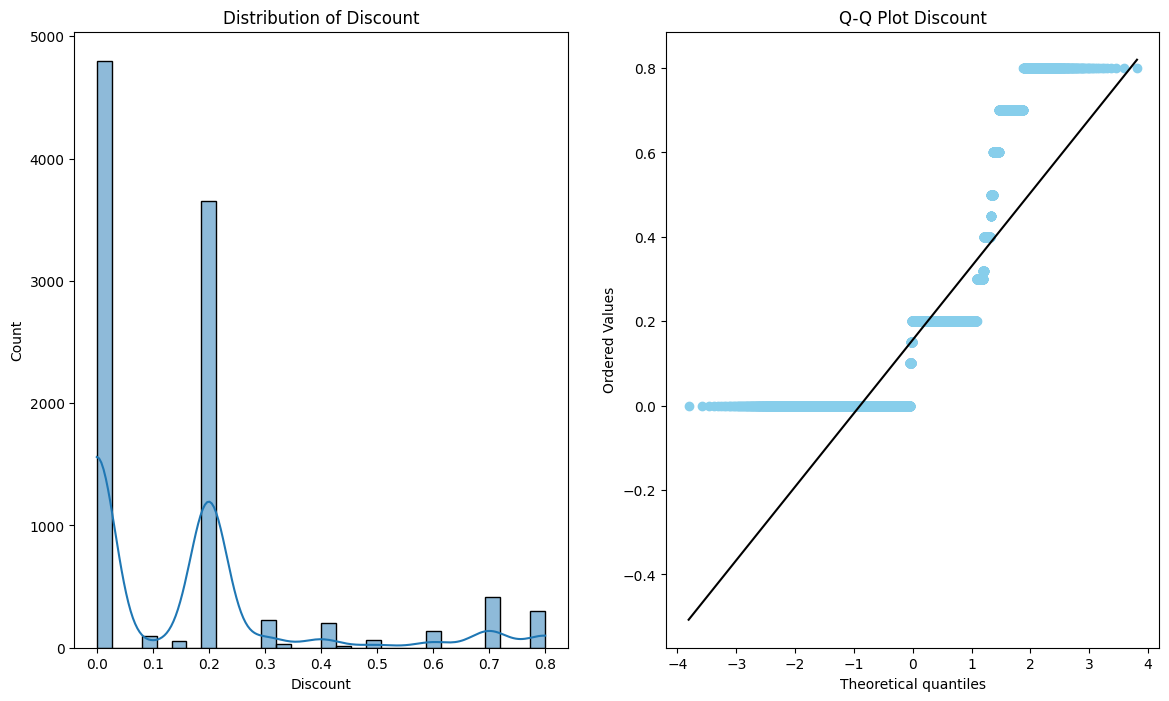

In [411]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Histogram Distribution Plot of Discount
sns.histplot(df['Discount'], bins=30, kde=True, ax=axs[0])

# Quantile-Quantile Q-Q Plot of Discount
osm, (slope, intercept, r) = stats.probplot(df['Discount'], dist="norm", plot=axs[1])

# Extract the R-Squared Value
r_squared = r ** 2
print(f"R-squared from Q-Q plot: {r_squared}")

# Set titles and colors
axs[0].set_title('Distribution of Discount')
axs[1].set_title('Q-Q Plot Discount')
lines = axs[1].get_lines()  # Lines for color options
lines[0].set_color('skyblue')
lines[1].set_color('black')


From the figures above, it can be concluded that:
1. Distribution of Discount histogram does not resemble the continuous, bell-shaped curve of a normal distribution. So it is not a Normal Distribution
2. In Quantile-Quantile Plot or Q-Q Plot, the data points show a step-like pattern, clustering at specific values and deviating substantially from the straight line, which is a clear indication that the data is not normally distributed.

In conclusion, Discount Data **is not a Normal Distribution** visually, as it both discrete and clustered around certain values

### 4. Quantity

In [412]:
# Perform the Shapiro-Wilk test on 'Quantity' column
shapiro_test = stats.shapiro(df['Quantity'])

# Create a DataFrame to store the results
shapiro_results_df = pd.DataFrame({
    'Test Statistic': [shapiro_test[0]],
    'p-value': [shapiro_test[1]]
})

# Display the DataFrame
shapiro_results_df

,Test Statistic,p-value
0,0.882391,1.518566e-65


For Quantity data, The Shapiro Test Statistic value is **0.882** which is far below 1.0 and 

the p-value is **1.518e-65**  which is also very far below the significance level 0.05.

So, we can conclude that Quantity data does not follow a Normal Distribution Numerically

R-squared from Q-Q plot: 0.8824705977817137


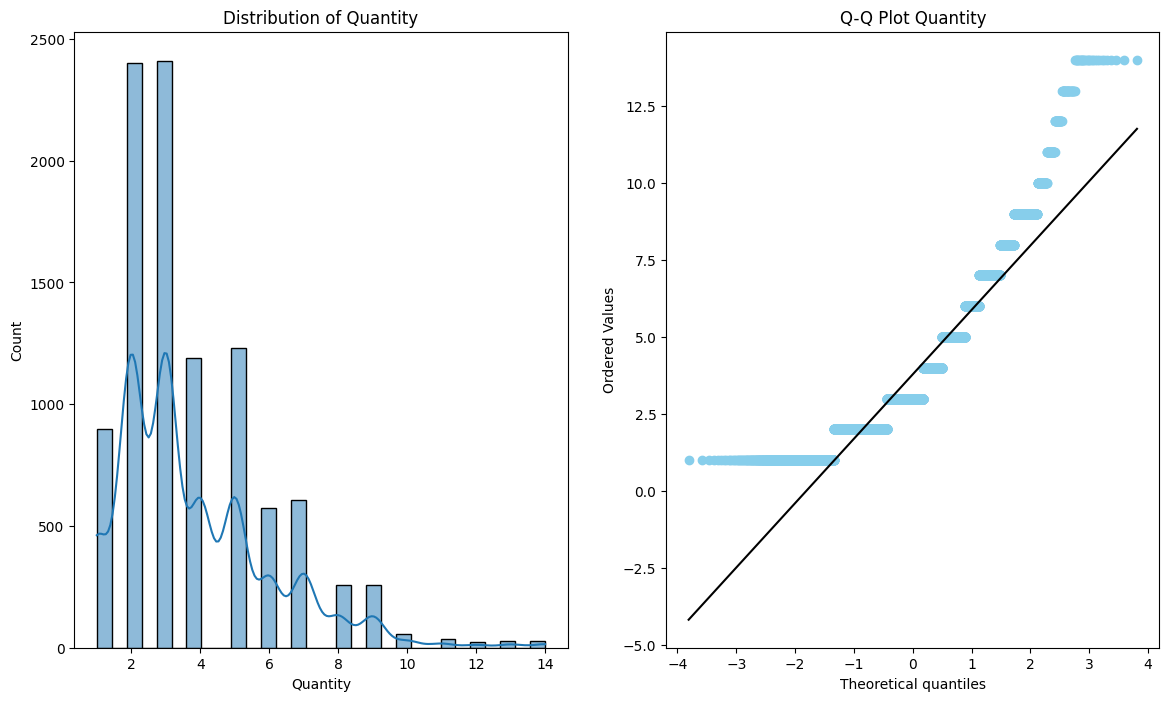

In [413]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Histogram Distribution Plot of Quantity
sns.histplot(df['Quantity'], bins=30, kde=True, ax=axs[0])

# Quantile-Quantile Q-Q Plot of Quantity
osm, (slope, intercept, r) = stats.probplot(df['Quantity'], dist="norm", plot=axs[1])

# Extract the R-Squared Value
r_squared = r ** 2
print(f"R-squared from Q-Q plot: {r_squared}")

# Set titles and colors
axs[0].set_title('Distribution of Quantity')
axs[1].set_title('Q-Q Plot Quantity')
lines = axs[1].get_lines()  # Lines for color options
lines[0].set_color('skyblue')
lines[1].set_color('black')


From the figures above, it can be concluded that:
1. Distribution of Quantity histogram does not follow a Bell Curve and Right-Skewed. So it is not a Normal Distribution
2. In Quantile-Quantile Plot or Q-Q Plot, the data points show a step-like pattern, clustering at specific values and deviating substantially from the straight line, which is a clear indication that the data is not normally distributed

In conclusion, Quantity Data **is not a Normal Distribution** visually, as it both discrete and clustered around certain values

## b. Variability

### 1. Cofficient of Variation

In [414]:
# Define a function to calculate these variability for a given column and round to 2 decimal places
def calculate_variability(column):
    mean = round(column.mean(), 2)
    variance = round(column.var(), 2)  # Sample variance
    std_dev = round(column.std(), 2)   # Sample standard deviation
    coef_of_variation = round(std_dev / mean, 2)
    return pd.Series({
        'Mean': mean,
        'Variance': variance,
        'Standard Deviation': std_dev,
        'Coefficient of Variation': coef_of_variation
    })

# Apply the function to each column of interest and store the results in a DataFrame
stats_df = pd.DataFrame({
    'Sales': calculate_variability(df['Sales']),
    'Profit': calculate_variability(df['Profit']),
    'Discount': calculate_variability(df['Discount']),
    'Quantity': calculate_variability(df['Quantity'])
})

stats_df 

,Sales,Profit,Discount,Quantity
Mean,229.86,28.66,0.16,3.79
Variance,388434.46,54877.80,0.04,4.95
Standard Deviation,623.25,234.26,0.21,2.23
Coefficient of Variation,2.71,8.17,1.31,0.59


A higher Coefficient of Variation or CV (e.g., above 0.5 or 50%) suggests high variability relative to the mean.

A CV below 0.1 (10%) indicates low variability relative to the mean.|

Rules of Thumb for Standard Deviation

1. **Low Variability**: Standard deviation is about 0–10% of the mean **(CV = 0-10%)**
2. **Moderate Variability**: Standard deviation is about 10–50% of the mean **(CV = 10-50%)**
3. **High Variability**: Standard deviation is more than 50% of the mean **(CV > 50%)**

In [415]:
# Define a function to calculate Coefficient of Variaton or CV in percentage
def cv_percentage(column):
    mean = round(column.mean(), 2)
    std_dev = round(column.std(), 2)   # Sample standard deviation
    cv_percent = round(std_dev / mean, 2) * 100
    cv_percent_str = f"{cv_percent}%"
    return pd.Series({
        'CV in percent': cv_percent_str
    })

# Apply the function to each column of interest and store the results in a DataFrame
cv_percent = pd.DataFrame({
    'Sales': cv_percentage(df['Sales']),
    'Profit': cv_percentage(df['Profit']),
    'Discount': cv_percentage(df['Discount']),
    'Quantity': cv_percentage(df['Quantity'])
})

cv_percent

,Sales,Profit,Discount,Quantity
CV in percent,271.0%,817.0%,131.0%,59.0%


- Sales, Profit, Discount, Quantity have a **high variability** beacuse their CV > 50%
- Profit has the highest variability among them which is **817.0%**
- Quantity has the lowest variability among them which is **59.0%**

## c. Correlation

### 1. Pearson Correlation

In [416]:
# Calculating Pearson correlation between 'Sales', 'Profit', 'Discount', 'Quantity'
correlation_matrix = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
correlation_matrix

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.479064,-0.028190,0.200795
Profit,0.479064,1.000000,-0.219487,0.066253
Discount,-0.028190,-0.219487,1.000000,0.008623
Quantity,0.200795,0.066253,0.008623,1.000000


- **Sales and Profit:** There is a moderate positive correlation (0.479) between Sales and Profit, which suggests that as Sales increase, Profit also tends to increase. This makes intuitive sense if higher sales generally contribute to higher profits.

- **Sales and Quantity:** A weak positive correlation (0.201) exists between Sales and Quantity, suggesting a mild association where more quantity sold may lead to higher sales, though it’s not a strong relationship.

- **Discount and Profit:** The negative correlation (-0.219) between Discount and Profit implies that as discounts increase, profit tends to decrease slightly, which is reasonable as higher discounts may reduce profit margins.

- **Other Pairs**: The correlations between other pairs (like Discount and Quantity) are very close to zero, indicating almost no linear relationship.

## Save the Cleaned Data to Excel

In [417]:
#df.to_excel('Cleaned_SaaS-Sales.xlsx', index=False)

# Data Analysis and Visualization

## a. Sales Analysis

In [418]:
# Extracting month and year
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Year'] = df['Order Date'].dt.to_period('Y')

df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022-11,2022
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022-11,2022
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022-06,2022
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021-10,2021
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021-10,2021


## Year-On-Year (YoY)

### 1. Sales YoY

In [419]:
# Group and format the data by Year
df_sales = df.groupby('Order Year')[["Sales"]].sum().reset_index()
df_sales['Sales'] = df_sales['Sales'].map('${:,.2f}'.format)

df_sales.head()

,Order Year,Sales
0,2020,"$484,247.50"
1,2021,"$470,532.51"
2,2022,"$608,473.83"
3,2023,"$733,947.02"


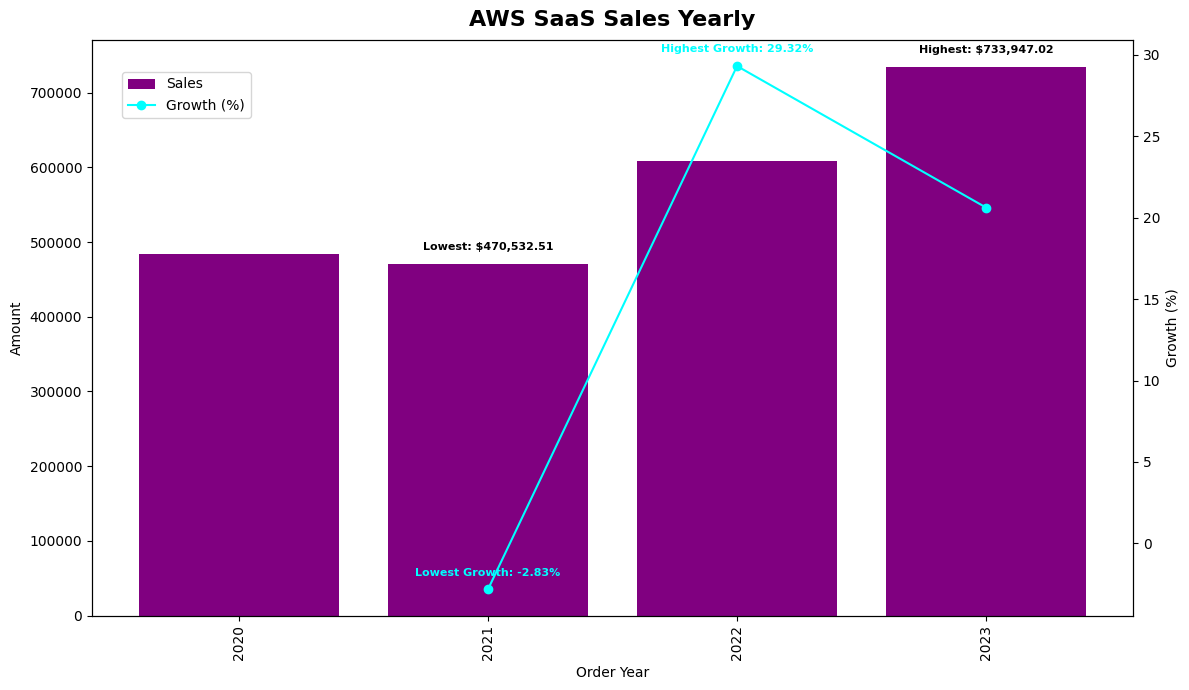

In [420]:

# Formatting the 'Sales' values
sales_values = df_sales['Sales'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate annual growth percentage
growth_percentage = sales_values.pct_change() * 100

# Prepare the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotting the Sales trends as bar charts on the first y-axis
ax1.bar(df_sales['Order Year'].astype(str), sales_values, color='purple', label='Sales')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Year')
ax1.set_ylabel('Amount')
ax1.tick_params(axis='x', rotation=90)

# Finding the indices for highest and lowest sales
max_index = sales_values.idxmax()
min_index = sales_values.idxmin()

# Annotating the highest and lowest sales points on ax1
ax1.annotate(f"Highest: {df_sales['Sales'][max_index]}", 
             (df_sales['Order Year'].astype(str)[max_index], sales_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')
ax1.annotate(f"Lowest: {df_sales['Sales'][min_index]}", 
             (df_sales['Order Year'].astype(str)[min_index], sales_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')

# Create a second y-axis for the growth percentage
ax2 = ax1.twinx()
ax2.plot(df_sales['Order Year'].astype(str), growth_percentage, color='cyan', marker='o', label='Growth (%)')
ax2.set_ylabel('Growth (%)')

# Finding the indices for highest and lowest growth
max_growth_index = growth_percentage.idxmax()
min_growth_index = growth_percentage.idxmin()

# Annotating the highest and lowest growth points on ax2
ax2.annotate(f"Highest Growth: {growth_percentage[max_growth_index]:.2f}%", 
             (df_sales['Order Year'].astype(str)[max_growth_index], growth_percentage[max_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')
ax2.annotate(f"Lowest Growth: {growth_percentage[min_growth_index]:.2f}%", 
             (df_sales['Order Year'].astype(str)[min_growth_index], growth_percentage[min_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('AWS SaaS Sales Yearly', size=16, pad=10, fontweight='bold')
plt.tight_layout()

plt.show()


- Yearly Sales tend to increase from year to year, except in 2021 the sales is slightly dropped from previous year **-2,83%**
- Lowest Sales is **$470,532.51** which is at year 2021
- Highest Sales is **$733,947.02** which is at year 2023

In [421]:
# Calculate the minimum, maximum, and average growth
min_growth_percentage = growth_percentage.min()
max_growth_percentage = growth_percentage.max()
avg_growth_percentage = growth_percentage.mean()

min_sales_values = sales_values.min()
max_sales_values = sales_values.max()
avg_sales_values = sales_values.mean()

# Create a DataFrame with these statistics
sales_growth_df = pd.DataFrame({
    'Metrics': ['Minimum', 'Maximum', 'Average'],
    'Growth (%)': [min_growth_percentage, max_growth_percentage, avg_growth_percentage],
    'Sales ($)': [min_sales_values, max_sales_values, avg_sales_values]
})

# Format Growth (%) to 2 decimal places
sales_growth_df['Growth (%)'] = sales_growth_df['Growth (%)'].round(2)

# Format Sales ($) with thousand separator and 2 decimal places
sales_growth_df['Sales ($)'] = sales_growth_df['Sales ($)'].apply(lambda x: f"{x:,.2f}")

# Display the DataFrame
sales_growth_df


,Metrics,Growth (%),Sales ($)
0,Minimum,-2.83,"470,532.51"
1,Maximum,29.32,"733,947.02"
2,Average,15.70,"574,300.21"


### 2. Profit YoY

In [422]:
# Group and format the data by Month
df_Profit = df.groupby('Order Year')[["Profit"]].sum().reset_index()
df_Profit['Profit'] = df_Profit['Profit'].map('${:,.2f}'.format)

df_Profit.head()

,Order Year,Profit
0,2020,"$49,543.97"
1,2021,"$61,618.60"
2,2022,"$81,726.93"
3,2023,"$93,507.51"


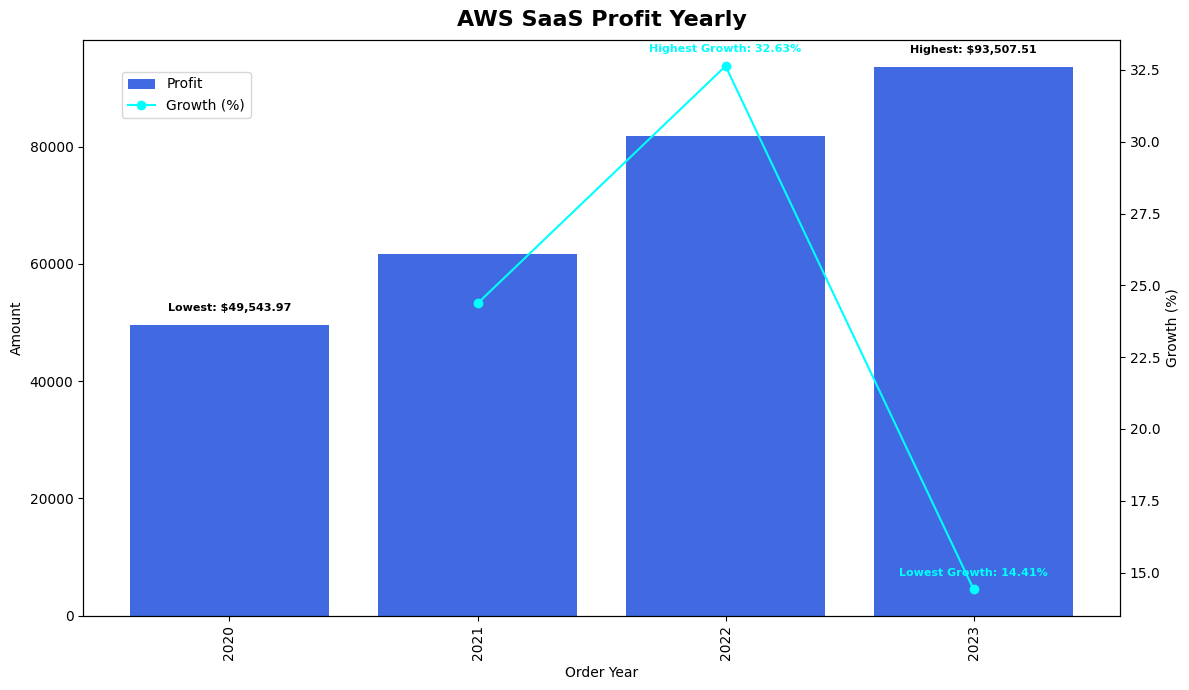

In [423]:
# Formatting the 'Profit' values
Profit_values = df_Profit['Profit'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate annual growth percentage
growth_percentage = Profit_values.pct_change() * 100

# Prepare the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotting the Profit trends as bar charts on the first y-axis
ax1.bar(df_Profit['Order Year'].astype(str), Profit_values, color='royalblue', label='Profit')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Year')
ax1.set_ylabel('Amount')
ax1.tick_params(axis='x', rotation=90)

# Finding the indices for highest and lowest Profit
max_index = Profit_values.idxmax()
min_index = Profit_values.idxmin()

# Annotating the highest and lowest Profit points on ax1
ax1.annotate(f"Highest: {df_Profit['Profit'][max_index]}", 
             (df_Profit['Order Year'].astype(str)[max_index], Profit_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')
ax1.annotate(f"Lowest: {df_Profit['Profit'][min_index]}", 
             (df_Profit['Order Year'].astype(str)[min_index], Profit_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')

# Create a second y-axis for the growth percentage
ax2 = ax1.twinx()
ax2.plot(df_Profit['Order Year'].astype(str), growth_percentage, color='cyan', marker='o', label='Growth (%)')
ax2.set_ylabel('Growth (%)')

# Finding the indices for highest and lowest growth
max_growth_index = growth_percentage.idxmax()
min_growth_index = growth_percentage.idxmin()

# Annotating the highest and lowest growth points on ax2
ax2.annotate(f"Highest Growth: {growth_percentage[max_growth_index]:.2f}%", 
             (df_Profit['Order Year'].astype(str)[max_growth_index], growth_percentage[max_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')
ax2.annotate(f"Lowest Growth: {growth_percentage[min_growth_index]:.2f}%", 
             (df_Profit['Order Year'].astype(str)[min_growth_index], growth_percentage[min_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('AWS SaaS Profit Yearly', size=16, pad=10, fontweight='bold')
plt.tight_layout()

plt.show()


- Yearly Profit tend to increase from year to year, from 2020-2023
- Lowest Profit is **$49,543.97** which is at year 2020
- Highest Profit is **$93,507.51** which is at year 2023

In [424]:
# Calculate the minimum, maximum, and average growth
min_growth_percentage = growth_percentage.min()
max_growth_percentage = growth_percentage.max()
avg_growth_percentage = growth_percentage.mean()

min_Profit_values = Profit_values.min()
max_Profit_values = Profit_values.max()
avg_Profit_values = Profit_values.mean()

# Create a DataFrame with these statistics
Profit_growth_df = pd.DataFrame({
    'Metrics': ['Minimum', 'Maximum', 'Average'],
    'Growth (%)': [min_growth_percentage, max_growth_percentage, avg_growth_percentage],
    'Profit ($)': [min_Profit_values, max_Profit_values, avg_Profit_values]
})

# Format Growth (%) to 2 decimal places
Profit_growth_df['Growth (%)'] = Profit_growth_df['Growth (%)'].round(2)

# Format Profit ($) with thousand separator and 2 decimal places
Profit_growth_df['Profit ($)'] = Profit_growth_df['Profit ($)'].apply(lambda x: f"{x:,.2f}")

# Display the DataFrame
Profit_growth_df


,Metrics,Growth (%),Profit ($)
0,Minimum,14.41,"49,543.97"
1,Maximum,32.63,"93,507.51"
2,Average,23.81,"71,599.25"


### 3. Profit Margin YoY

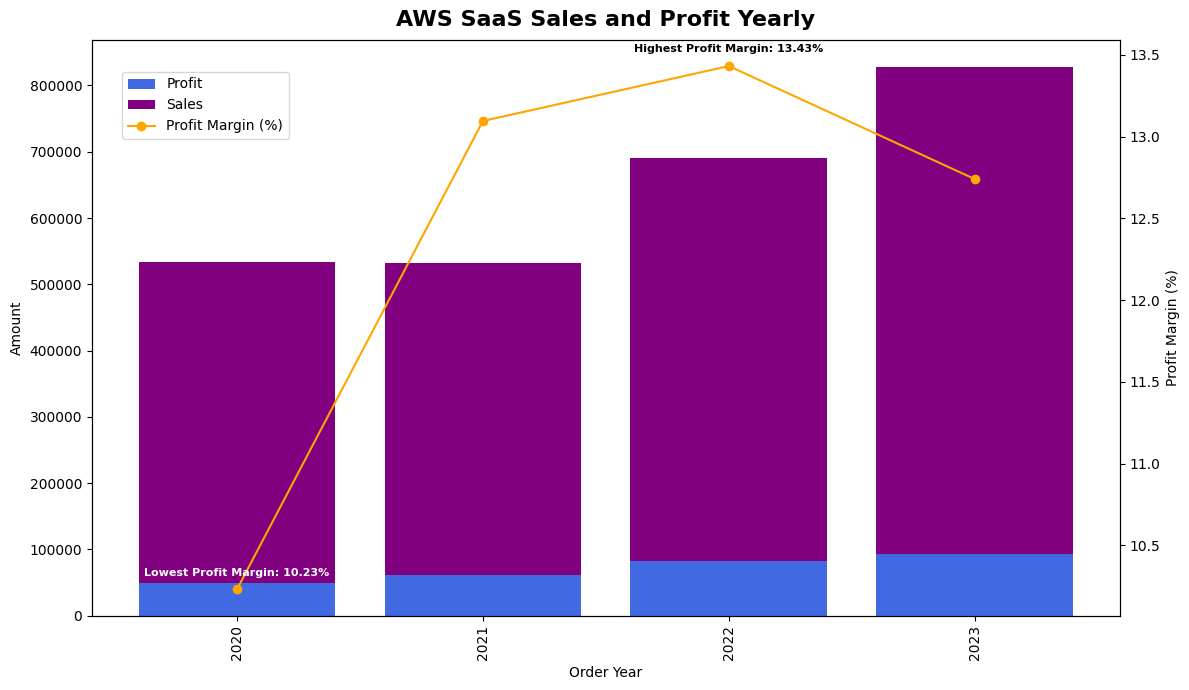

In [425]:
# Prepare the plot and clean the 'Sales' and 'Profit' values for plotting
fig, ax1 = plt.subplots(figsize=(12, 7))
sales_values = df_sales['Sales'].str.replace('[\$,]', '', regex=True).astype(float)
profit_values = df_Profit['Profit'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate profit margin
profit_margin = (profit_values / sales_values) * 100

# Determine colors for Profit bars based on their values
profit_colors = ['royalblue' if value >= 0 else 'red' for value in profit_values]

# Plotting the Profit and Sales trends as stacked bar charts on the first y-axis
ax1.bar(df_Profit['Order Year'].astype(str), profit_values, color=profit_colors, label='Profit')
ax1.bar(df_sales['Order Year'].astype(str), sales_values, bottom=profit_values, color='purple', label='Sales')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Year')
ax1.set_ylabel('Amount')
ax1.set_title('AWS SaaS Sales and Profit Yearly', size=16, pad=10, fontweight='bold')
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis for the profit margin
ax2 = ax1.twinx()
ax2.plot(df_Profit['Order Year'].astype(str), profit_margin, color='orange', marker='o', label='Profit Margin (%)')
ax2.set_ylabel('Profit Margin (%)')

# Finding the indices for highest and lowest Profit Margin
max_margin_index = profit_margin.idxmax()
min_margin_index = profit_margin.idxmin()

# Annotating the highest and lowest Profit Margin points
ax2.annotate(f"Highest Profit Margin: {profit_margin[max_margin_index]:.2f}%", 
             (df_Profit['Order Year'].astype(str)[max_margin_index], profit_margin[max_margin_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')
ax2.annotate(f"Lowest Profit Margin: {profit_margin[min_margin_index]:.2f}%", 
             (df_Profit['Order Year'].astype(str)[min_margin_index], profit_margin[min_margin_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='white')


# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()

plt.show()


- Yearly Profit Margin tend to increase from year to year, except in 2023 the Profit Margin is slightly dropped from previous year
- Lowest Profit Margin is **10.23%** which is at year 2020
- Highest Profit Margin is **13.43%** which is at year 2022

In [426]:
# Calculate the minimum, maximum, and average profit margin
min_profit_margin = profit_margin.min()
max_profit_margin = profit_margin.max()
avg_profit_margin = profit_margin.mean()

# Create a DataFrame with these statistics
profit_margin_df = pd.DataFrame({
    'Profit Margin': ['Minimum', 'Maximum', 'Average'],
    'Value (%)': [min_profit_margin, max_profit_margin, avg_profit_margin]
})

# Display the DataFrame
profit_margin_df


,Profit Margin,Value (%)
0,Minimum,10.231126
1,Maximum,13.431462
2,Average,12.374613


### Quarter-on-Quarter (QoQ)

In [427]:
# Making a new column (Quarter)
df['Order Quarter'] = pd.to_datetime(df['Order Date']).dt.to_period('Q').astype(str)

In [428]:
# To Cehck the New Column Order Quarter
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Quarter
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022-11,2022,2022Q4
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022-11,2022,2022Q4
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022-06,2022,2022Q2
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021-10,2021,2021Q4
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021-10,2021,2021Q4


### 1. Sales QoQ

In [429]:
# Group and format the data by Month
df_sales = df.groupby('Order Quarter')[["Sales"]].sum().reset_index()
df_sales['Sales'] = df_sales['Sales'].map('${:,.2f}'.format)

df_sales.head()

,Order Quarter,Sales
0,2020Q1,"$74,447.80"
1,2020Q2,"$86,538.76"
2,2020Q3,"$143,633.21"
3,2020Q4,"$179,627.73"
4,2021Q1,"$68,851.74"


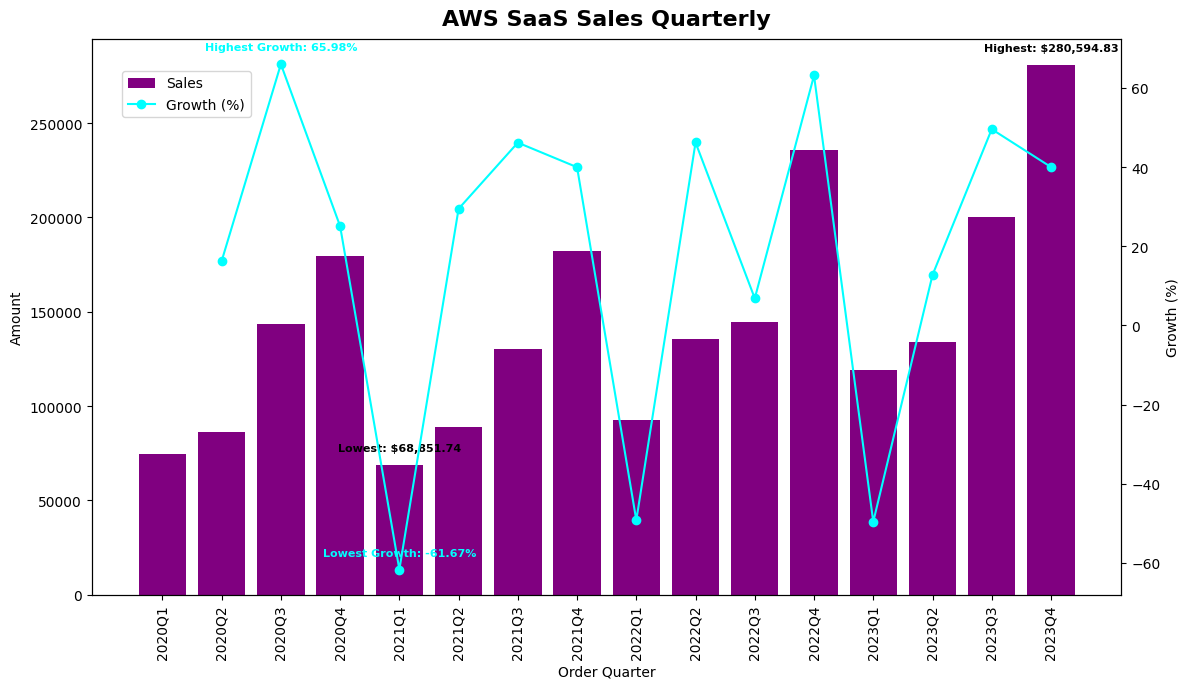

In [430]:

# Formatting the 'Sales' values
sales_values = df_sales['Sales'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate annual growth percentage
growth_percentage = sales_values.pct_change() * 100

# Prepare the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotting the Sales trends as bar charts on the first y-axis
ax1.bar(df_sales['Order Quarter'].astype(str), sales_values, color='purple', label='Sales')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Quarter')
ax1.set_ylabel('Amount')
ax1.tick_params(axis='x', rotation=90)

# Finding the indices for highest and lowest sales
max_index = sales_values.idxmax()
min_index = sales_values.idxmin()

# Annotating the highest and lowest sales points on ax1
ax1.annotate(f"Highest: {df_sales['Sales'][max_index]}", 
             (df_sales['Order Quarter'].astype(str)[max_index], sales_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')
ax1.annotate(f"Lowest: {df_sales['Sales'][min_index]}", 
             (df_sales['Order Quarter'].astype(str)[min_index], sales_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')

# Create a second y-axis for the growth percentage
ax2 = ax1.twinx()
ax2.plot(df_sales['Order Quarter'].astype(str), growth_percentage, color='cyan', marker='o', label='Growth (%)')
ax2.set_ylabel('Growth (%)')

# Finding the indices for highest and lowest growth
max_growth_index = growth_percentage.idxmax()
min_growth_index = growth_percentage.idxmin()

# Annotating the highest and lowest growth points on ax2
ax2.annotate(f"Highest Growth: {growth_percentage[max_growth_index]:.2f}%", 
             (df_sales['Order Quarter'].astype(str)[max_growth_index], growth_percentage[max_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')
ax2.annotate(f"Lowest Growth: {growth_percentage[min_growth_index]:.2f}%", 
             (df_sales['Order Quarter'].astype(str)[min_growth_index], growth_percentage[min_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('AWS SaaS Sales Quarterly', size=16, pad=10, fontweight='bold')
plt.tight_layout()

plt.show()


- Quarterly Sales tend to increase from Q1 until Q4 in each year, 
- With the lowest sales taking place in Q1 and the highest sales taking place in Q4 in each year
- Lowest Sales is **68,851.74** which is at Q1 2021
- Highest Sales is **$280,594.83** which is at Q4 2023

In [431]:
# Calculate the minimum, maximum, and average growth
min_growth_percentage = growth_percentage.min()
max_growth_percentage = growth_percentage.max()
avg_growth_percentage = growth_percentage.mean()

min_sales_values = sales_values.min()
max_sales_values = sales_values.max()
avg_sales_values = sales_values.mean()

# Create a DataFrame with these statistics
sales_growth_df = pd.DataFrame({
    'Metrics': ['Minimum', 'Maximum', 'Average'],
    'Growth (%)': [min_growth_percentage, max_growth_percentage, avg_growth_percentage],
    'Sales ($)': [min_sales_values, max_sales_values, avg_sales_values]
})

# Format Growth (%) to 2 decimal places
sales_growth_df['Growth (%)'] = sales_growth_df['Growth (%)'].round(2)

# Format Sales ($) with thousand separator and 2 decimal places
sales_growth_df['Sales ($)'] = sales_growth_df['Sales ($)'].apply(lambda x: f"{x:,.2f}")

# Display the DataFrame
sales_growth_df


,Metrics,Growth (%),Sales ($)
0,Minimum,-61.67,"68,851.74"
1,Maximum,65.98,"280,594.83"
2,Average,18.72,"143,575.05"


### 2. Profit QoQ

In [432]:
# Group and format the data by Profit
df_Profit = df.groupby('Order Quarter')[["Profit"]].sum().reset_index()
df_Profit['Profit'] = df_Profit['Profit'].map('${:,.2f}'.format)

df_Profit.head()

,Order Quarter,Profit
0,2020Q1,"$3,811.23"
1,2020Q2,"$11,204.07"
2,2020Q3,"$12,804.72"
3,2020Q4,"$21,723.95"
4,2021Q1,"$9,264.94"


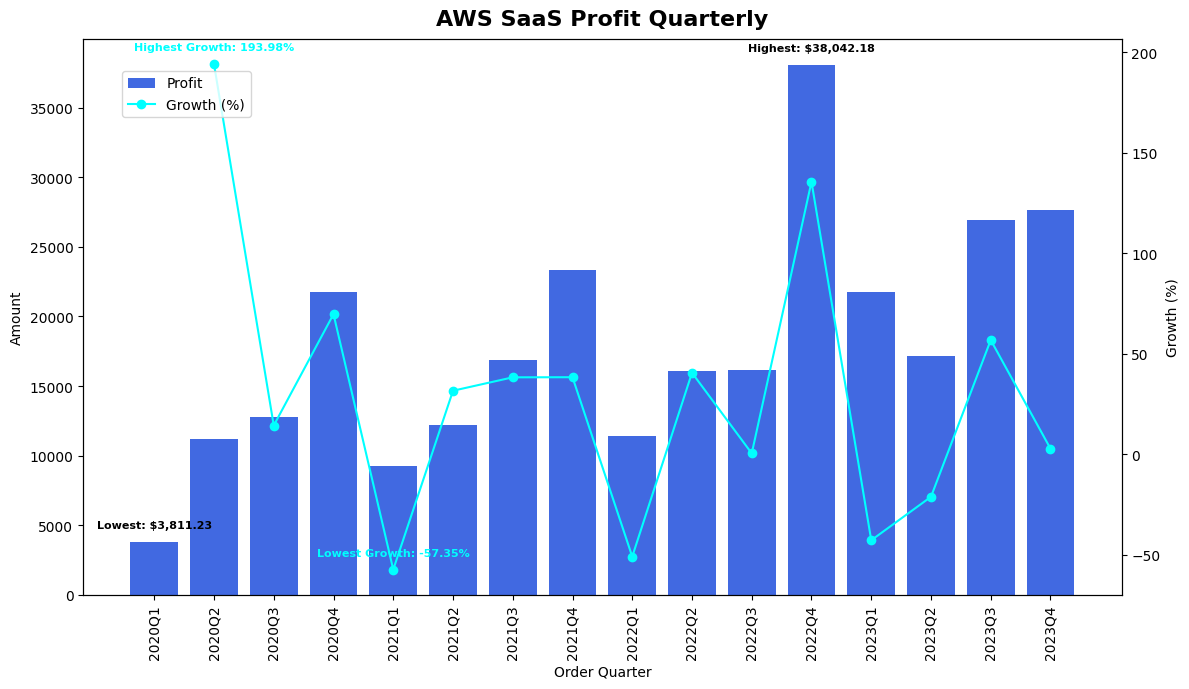

In [433]:
# Formatting the 'Profit' values
Profit_values = df_Profit['Profit'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate annual growth percentage
growth_percentage = Profit_values.pct_change() * 100

# Prepare the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotting the Profit trends as bar charts on the first y-axis
ax1.bar(df_Profit['Order Quarter'].astype(str), Profit_values, color='royalblue', label='Profit')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Quarter')
ax1.set_ylabel('Amount')
ax1.tick_params(axis='x', rotation=90)

# Finding the indices for highest and lowest Profit
max_index = Profit_values.idxmax()
min_index = Profit_values.idxmin()

# Annotating the highest and lowest Profit points on ax1
ax1.annotate(f"Highest: {df_Profit['Profit'][max_index]}", 
             (df_Profit['Order Quarter'].astype(str)[max_index], Profit_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')
ax1.annotate(f"Lowest: {df_Profit['Profit'][min_index]}", 
             (df_Profit['Order Quarter'].astype(str)[min_index], Profit_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')

# Create a second y-axis for the growth percentage
ax2 = ax1.twinx()
ax2.plot(df_Profit['Order Quarter'].astype(str), growth_percentage, color='cyan', marker='o', label='Growth (%)')
ax2.set_ylabel('Growth (%)')

# Finding the indices for highest and lowest growth
max_growth_index = growth_percentage.idxmax()
min_growth_index = growth_percentage.idxmin()

# Annotating the highest and lowest growth points on ax2
ax2.annotate(f"Highest Growth: {growth_percentage[max_growth_index]:.2f}%", 
             (df_Profit['Order Quarter'].astype(str)[max_growth_index], growth_percentage[max_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')
ax2.annotate(f"Lowest Growth: {growth_percentage[min_growth_index]:.2f}%", 
             (df_Profit['Order Quarter'].astype(str)[min_growth_index], growth_percentage[min_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('AWS SaaS Profit Quarterly', size=16, pad=10, fontweight='bold')
plt.tight_layout()

plt.show()


- Lowest Profit Quarterly is **$3,811.23** which happened on 2020Q1
- Highest Profit Quaerterly is **$38,042.18** which happened on 2022Q4

In [434]:
# Calculate the minimum, maximum, and average growth
min_growth_percentage = growth_percentage.min()
max_growth_percentage = growth_percentage.max()
avg_growth_percentage = growth_percentage.mean()

min_Profit_values = Profit_values.min()
max_Profit_values = Profit_values.max()
avg_Profit_values = Profit_values.mean()

# Create a DataFrame with these statistics
Profit_growth_df = pd.DataFrame({
    'Metrics': ['Minimum', 'Maximum', 'Average'],
    'Growth (%)': [min_growth_percentage, max_growth_percentage, avg_growth_percentage],
    'Profit ($)': [min_Profit_values, max_Profit_values, avg_Profit_values]
})

# Format Growth (%) to 2 decimal places
Profit_growth_df['Growth (%)'] = Profit_growth_df['Growth (%)'].round(2)

# Format Profit ($) with thousand separator and 2 decimal places
Profit_growth_df['Profit ($)'] = Profit_growth_df['Profit ($)'].apply(lambda x: f"{x:,.2f}")

# Display the DataFrame
Profit_growth_df


,Metrics,Growth (%),Profit ($)
0,Minimum,-57.35,"3,811.23"
1,Maximum,193.98,"38,042.18"
2,Average,29.99,"17,899.81"


### 3. Profit Margin QoQ

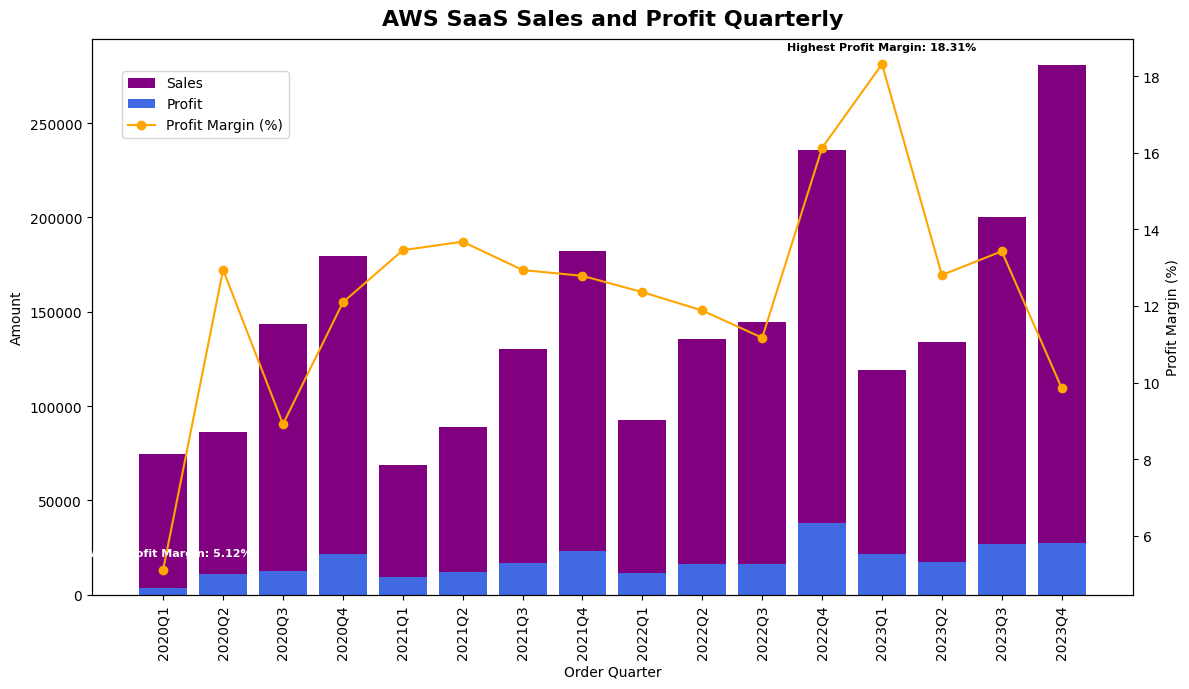

In [435]:


# Prepare the plot and clean the 'Sales' and 'Profit' values for plotting
fig, ax1 = plt.subplots(figsize=(12, 7))
sales_values = df_sales['Sales'].str.replace('[\$,]', '', regex=True).astype(float)
profit_values = df_Profit['Profit'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate profit margin
profit_margin = (profit_values / sales_values) * 100

# Determine colors for Profit bars based on their values
profit_colors = ['royalblue' if value >= 0 else 'royalblue' for value in profit_values]

# Plotting the Sales trends as bar charts on the first y-axis
ax1.bar(df_sales['Order Quarter'].astype(str), sales_values, color='purple', label='Sales')

# Plotting the Profit trends as bar charts on the first y-axis
ax1.bar(df_Profit['Order Quarter'].astype(str), profit_values, color=profit_colors, label='Profit')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Quarter')
ax1.set_ylabel('Amount')
ax1.set_title('AWS SaaS Sales and Profit Quarterly', size=16, pad=10, fontweight='bold')
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis for the profit margin
ax2 = ax1.twinx()
ax2.plot(df_Profit['Order Quarter'].astype(str), profit_margin, color='orange', marker='o', label='Profit Margin (%)')
ax2.set_ylabel('Profit Margin (%)')

# Finding the indices for highest and lowest Profit Margin
max_margin_index = profit_margin.idxmax()
min_margin_index = profit_margin.idxmin()

# Annotating the highest and lowest Profit Margin points
ax2.annotate(f"Highest Profit Margin: {profit_margin[max_margin_index]:.2f}%", 
             (df_Profit['Order Quarter'].astype(str)[max_margin_index], profit_margin[max_margin_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')
ax2.annotate(f"Lowest Profit Margin: {profit_margin[min_margin_index]:.2f}%", 
             (df_Profit['Order Quarter'].astype(str)[min_margin_index], profit_margin[min_margin_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='white')

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()

plt.show()


- Company Profit Margin Quarterly tends to increase from 2021Q1 until 2023Q1, the highest profit margin **18.31%**
- After that, profit margin tends to decrease until 2023Q4 around **10%**

In [436]:
# Calculate the minimum, maximum, and average profit margin
min_profit_margin = profit_margin.min()
max_profit_margin = profit_margin.max()
avg_profit_margin = profit_margin.mean()

# Create a DataFrame with these statistics
profit_margin_df = pd.DataFrame({
    'Profit Margin': ['Minimum', 'Maximum', 'Average'],
    'Value (%)': [min_profit_margin, max_profit_margin, avg_profit_margin]
})

# Display the DataFrame
profit_margin_df


,Profit Margin,Value (%)
0,Minimum,5.119332
1,Maximum,18.312054
2,Average,12.367458


### Month-On-Month (MoM)

### 1. Sales MoM

In [437]:
# Group and format the data by Month
df_sales = df.groupby('Order Month')[["Sales"]].sum().reset_index()
df_sales['Sales'] = df_sales['Sales'].map('${:,.2f}'.format)

df_sales.head()

,Order Month,Sales
0,2020-01,"$13,946.23"
1,2020-02,"$4,810.56"
2,2020-03,"$55,691.01"
3,2020-04,"$28,295.35"
4,2020-05,"$23,648.29"


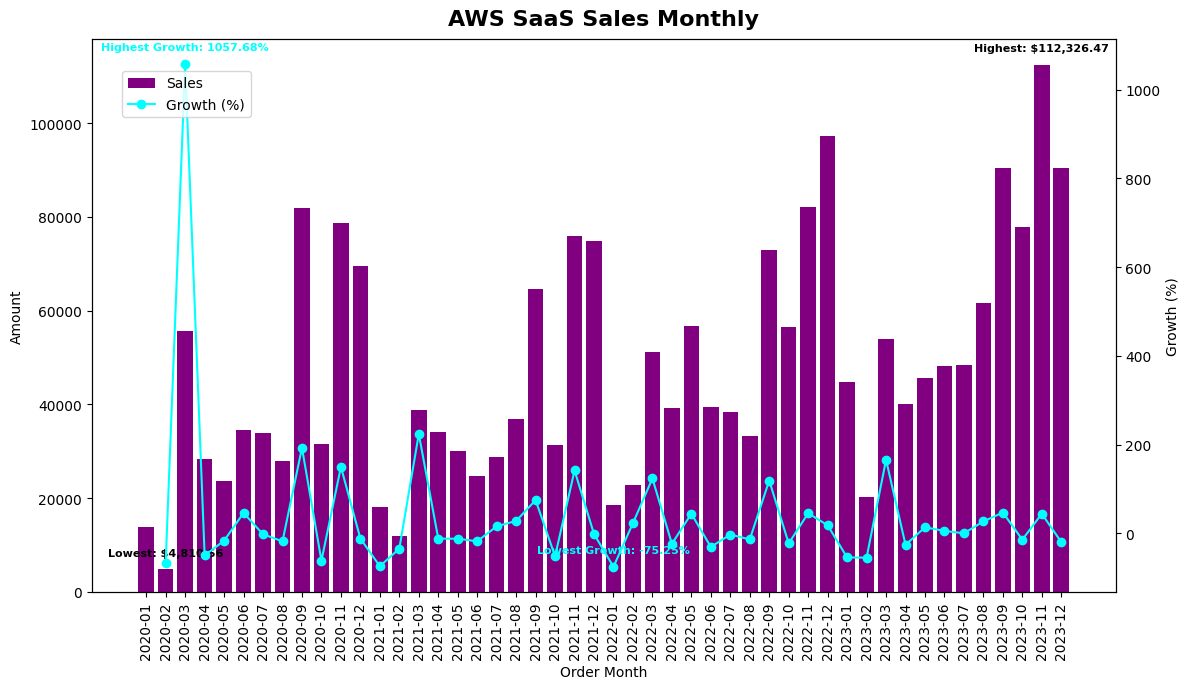

In [438]:

# Formatting the 'Sales' values
sales_values = df_sales['Sales'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate annual growth percentage
growth_percentage = sales_values.pct_change() * 100

# Prepare the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotting the Sales trends as bar charts on the first y-axis
ax1.bar(df_sales['Order Month'].astype(str), sales_values, color='purple', label='Sales')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Month')
ax1.set_ylabel('Amount')
ax1.tick_params(axis='x', rotation=90)

# Finding the indices for highest and lowest sales
max_index = sales_values.idxmax()
min_index = sales_values.idxmin()

# Annotating the highest and lowest sales points on ax1
ax1.annotate(f"Highest: {df_sales['Sales'][max_index]}", 
             (df_sales['Order Month'].astype(str)[max_index], sales_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')
ax1.annotate(f"Lowest: {df_sales['Sales'][min_index]}", 
             (df_sales['Order Month'].astype(str)[min_index], sales_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')

# Create a second y-axis for the growth percentage
ax2 = ax1.twinx()
ax2.plot(df_sales['Order Month'].astype(str), growth_percentage, color='cyan', marker='o', label='Growth (%)')
ax2.set_ylabel('Growth (%)')

# Finding the indices for highest and lowest growth
max_growth_index = growth_percentage.idxmax()
min_growth_index = growth_percentage.idxmin()

# Annotating the highest and lowest growth points on ax2
ax2.annotate(f"Highest Growth: {growth_percentage[max_growth_index]:.2f}%", 
             (df_sales['Order Month'].astype(str)[max_growth_index], growth_percentage[max_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')
ax2.annotate(f"Lowest Growth: {growth_percentage[min_growth_index]:.2f}%", 
             (df_sales['Order Month'].astype(str)[min_growth_index], growth_percentage[min_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('AWS SaaS Sales Monthly', size=16, pad=10, fontweight='bold')
plt.tight_layout()

plt.show()


- Every January and February, the Sales tends to drop significant from end of year
- Every November and December, company sales tends to significantly surge or skyrocket

In [439]:
# Calculate the minimum, maximum, and average growth
min_growth_percentage = growth_percentage.min()
max_growth_percentage = growth_percentage.max()
avg_growth_percentage = growth_percentage.mean()

min_sales_values = sales_values.min()
max_sales_values = sales_values.max()
avg_sales_values = sales_values.mean()

# Create a DataFrame with these statistics
sales_growth_df = pd.DataFrame({
    'Metrics': ['Minimum', 'Maximum', 'Average'],
    'Growth (%)': [min_growth_percentage, max_growth_percentage, avg_growth_percentage],
    'Sales ($)': [min_sales_values, max_sales_values, avg_sales_values]
})

# Format Growth (%) to 2 decimal places
sales_growth_df['Growth (%)'] = sales_growth_df['Growth (%)'].round(2)

# Format Sales ($) with thousand separator and 2 decimal places
sales_growth_df['Sales ($)'] = sales_growth_df['Sales ($)'].apply(lambda x: f"{x:,.2f}")

# Display the DataFrame
sales_growth_df


,Metrics,Growth (%),Sales ($)
0,Minimum,-75.25,"4,810.56"
1,Maximum,1057.68,"112,326.47"
2,Average,39.36,"47,858.35"


### 2. Profit MoM

In [440]:
# Group and format the data by Month
df_Profit = df.groupby('Order Month')[["Profit"]].sum().reset_index()
df_Profit['Profit'] = df_Profit['Profit'].map('${:,.2f}'.format)

df_Profit.head()

,Order Month,Profit
0,2020-01,"$2,446.77"
1,2020-02,$865.73
2,2020-03,$498.73
3,2020-04,"$3,488.84"
4,2020-05,"$2,738.71"


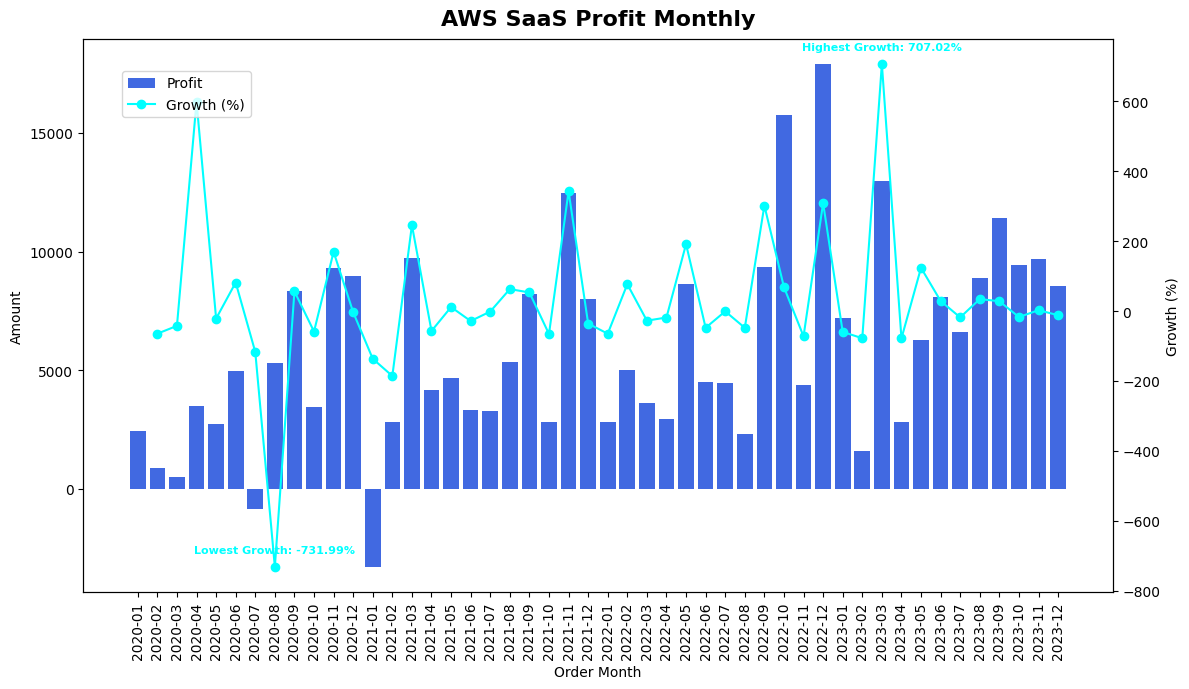

In [441]:
# Formatting the 'Profit' values
Profit_values = df_Profit['Profit'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate annual growth percentage
growth_percentage = Profit_values.pct_change() * 100

# Prepare the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotting the Profit trends as bar charts on the first y-axis
ax1.bar(df_Profit['Order Month'].astype(str), Profit_values, color='royalblue', label='Profit')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Month')
ax1.set_ylabel('Amount')
ax1.tick_params(axis='x', rotation=90)

# Finding the indices for highest and lowest Profit
max_index = Profit_values.idxmax()
min_index = Profit_values.idxmin()


# Create a second y-axis for the growth percentage
ax2 = ax1.twinx()
ax2.plot(df_Profit['Order Month'].astype(str), growth_percentage, color='cyan', marker='o', label='Growth (%)')
ax2.set_ylabel('Growth (%)')

# Finding the indices for highest and lowest growth
max_growth_index = growth_percentage.idxmax()
min_growth_index = growth_percentage.idxmin()

# Annotating the highest and lowest growth points on ax2
ax2.annotate(f"Highest Growth: {growth_percentage[max_growth_index]:.2f}%", 
             (df_Profit['Order Month'].astype(str)[max_growth_index], growth_percentage[max_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')
ax2.annotate(f"Lowest Growth: {growth_percentage[min_growth_index]:.2f}%", 
             (df_Profit['Order Month'].astype(str)[min_growth_index], growth_percentage[min_growth_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='cyan')

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('AWS SaaS Profit Monthly', size=16, pad=10, fontweight='bold')
plt.tight_layout()

plt.show()


- There are two time company suffered losses monthly in 2020-07 and 2021-01

In [442]:
# Calculate the minimum, maximum, and average growth
min_growth_percentage = growth_percentage.min()
max_growth_percentage = growth_percentage.max()
avg_growth_percentage = growth_percentage.mean()

min_Profit_values = Profit_values.min()
max_Profit_values = Profit_values.max()
avg_Profit_values = Profit_values.mean()

# Create a DataFrame with these statistics
Profit_growth_df = pd.DataFrame({
    'Metrics': ['Minimum', 'Maximum', 'Average'],
    'Growth (%)': [min_growth_percentage, max_growth_percentage, avg_growth_percentage],
    'Profit ($)': [min_Profit_values, max_Profit_values, avg_Profit_values]
})

# Format Growth (%) to 2 decimal places
Profit_growth_df['Growth (%)'] = Profit_growth_df['Growth (%)'].round(2)

# Format Profit ($) with thousand separator and 2 decimal places
Profit_growth_df['Profit ($)'] = Profit_growth_df['Profit ($)'].apply(lambda x: f"{x:,.2f}")

# Display the DataFrame
Profit_growth_df


,Metrics,Growth (%),Profit ($)
0,Minimum,-731.99,"-3,281.01"
1,Maximum,707.02,"17,902.73"
2,Average,29.87,"5,966.61"


### 3. Profit Margin MoM

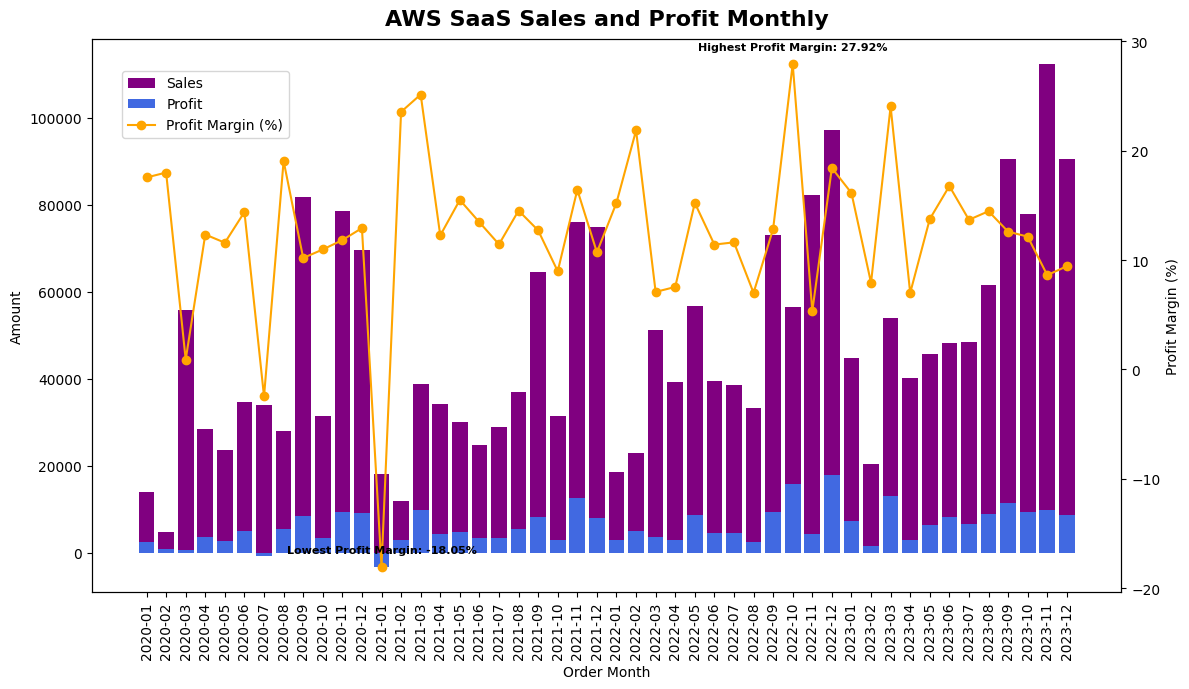

In [443]:


# Prepare the plot and clean the 'Sales' and 'Profit' values for plotting
fig, ax1 = plt.subplots(figsize=(12, 7))
sales_values = df_sales['Sales'].str.replace('[\$,]', '', regex=True).astype(float)
profit_values = df_Profit['Profit'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate profit margin
profit_margin = (profit_values / sales_values) * 100

# Determine colors for Profit bars based on their values
profit_colors = ['royalblue' if value >= 0 else 'royalblue' for value in profit_values]

# Plotting the Sales trends as bar charts on the first y-axis
ax1.bar(df_sales['Order Month'].astype(str), sales_values, color='purple', label='Sales')

# Plotting the Profit trends as bar charts on the first y-axis
ax1.bar(df_Profit['Order Month'].astype(str), profit_values, color=profit_colors, label='Profit')

# Setting labels and formatting for the first y-axis
ax1.set_xlabel('Order Month')
ax1.set_ylabel('Amount')
ax1.set_title('AWS SaaS Sales and Profit Monthly', size=16, pad=10, fontweight='bold')
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis for the profit margin
ax2 = ax1.twinx()
ax2.plot(df_Profit['Order Month'].astype(str), profit_margin, color='orange', marker='o', label='Profit Margin (%)')
ax2.set_ylabel('Profit Margin (%)')

# Finding the indices for highest and lowest Profit Margin
max_margin_index = profit_margin.idxmax()
min_margin_index = profit_margin.idxmin()

# Annotating the highest and lowest Profit Margin points
ax2.annotate(f"Highest Profit Margin: {profit_margin[max_margin_index]:.2f}%", 
             (df_Profit['Order Month'].astype(str)[max_margin_index], profit_margin[max_margin_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')
ax2.annotate(f"Lowest Profit Margin: {profit_margin[min_margin_index]:.2f}%", 
             (df_Profit['Order Month'].astype(str)[min_margin_index], profit_margin[min_margin_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold', color='black')

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()

plt.show()


- Lowest profit margin is **-18.05%** on 2021-01
- Highest Profit margin is **27.92** on 2022-10

In [444]:
# Calculate the minimum, maximum, and average profit margin
min_profit_margin = profit_margin.min()
max_profit_margin = profit_margin.max()
avg_profit_margin = profit_margin.mean()

# Create a DataFrame with these statistics
profit_margin_df = pd.DataFrame({
    'Profit Margin': ['Minimum', 'Maximum', 'Average'],
    'Value (%)': [min_profit_margin, max_profit_margin, avg_profit_margin]
})

# Display the DataFrame
profit_margin_df


,Profit Margin,Value (%)
0,Minimum,-18.053238
1,Maximum,27.918006
2,Average,12.534847


## Geographic Map

In [445]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Quarter
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022-11,2022,2022Q4
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022-11,2022,2022Q4
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022-06,2022,2022Q2
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021-10,2021,2021Q4
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021-10,2021,2021Q4


In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


### By Sales

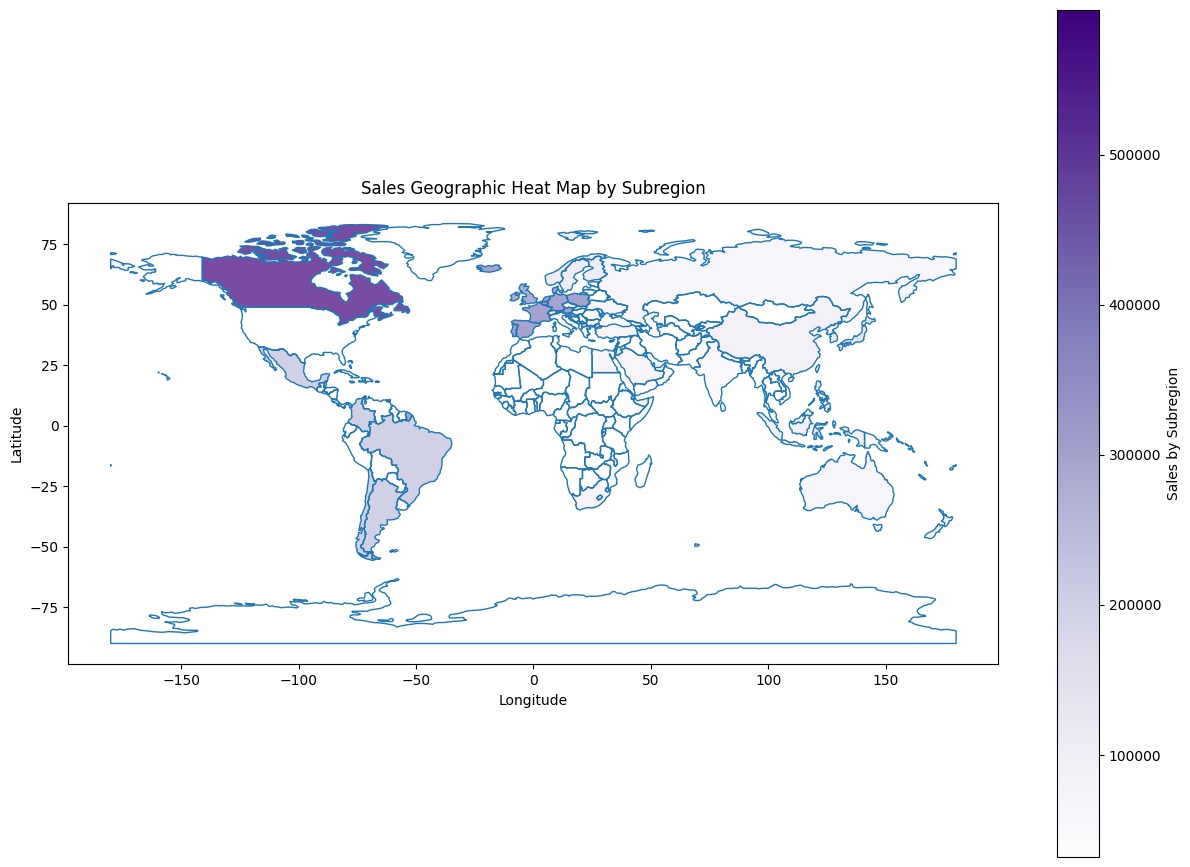

In [450]:

# Subregion to country mapping
subregion_countries = {
    "LATAM": ["Costa Rica", "Brazil", "Chile", "Colombia", "Mexico", "Argentina"],
    "NAMER": ["United States", "Canada"],
    "ANZ": ["Australia", "New Zealand"],
    "APAC": ["Philippines", "Singapore", "South Korea", "China", "Indonesia", "Taiwan"],
    "IND": ["India"],
    "JAPN": ["Japan"],
    "EU": ["Italy"],
    "EU-EAST": ["Russia", "Czech Republic", "Israel", "Ukraine", "Greece"],
    "EU-WEST": ["Germany", "France", "Luxembourg", "Spain", "Portugal", "Belgium", "Netherlands", "Poland", "Austria", "Denmark", "Croatia", "Slovenia", "Iceland"],
    "MEA": ["Turkey", "South Africa", "Saudi Arabia", "United Arab Emirates", "Egypt", "Qatar"],
    "NOR": ["Sweden", "Finland", "Norway"],
    "UKIR": ["Ireland", "United Kingdom"],
}

# Load the shapefile
world = gpd.read_file(r'D:\Masterclass\Purwadhika\Capstone\Module 2\Package\ne_110m_admin_0_countries.shp')

# Filter countries by subregion
gdf = world[world['NAME'].apply(lambda x: any(x in countries for countries in subregion_countries.values()))]

# Add sales data to GeoDataFrame by mapping countries to their subregion sales
def get_sales_by_country(country_name):
    for subregion, countries in subregion_countries.items():
        if country_name in countries:
            # Sum sales for each subregion
            total_sales = df[df['Subregion'] == subregion]['Sales'].sum()
            return total_sales
    return 0

gdf['sales'] = gdf['NAME'].apply(get_sales_by_country)

# Plotting
fig, ax = plt.subplots(figsize=(15, 11))
world.boundary.plot(ax=ax, linewidth=1)

# Plot countries with sales data using Purples colormap
gdf.plot(
    ax=ax,
    column='sales',
    cmap='Purples',
    legend=True,
    legend_kwds={'label': "Sales by Subregion"},
    alpha=0.7
)

plt.title('Sales Geographic Heat Map by Subregion')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [467]:
# Group by 'Subregion' and sum the 'Sales' column
subregion_sales = df.groupby('Subregion')['Sales'].sum().reset_index()

# Sorting
subregion_sales = subregion_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Formatting the Sales value
subregion_sales['Sales'] = subregion_sales['Sales'].apply(lambda x: f"${x:,.2f}")

subregion_sales

,Subregion,Sales
0,NAMER,"$596,328.90"
1,EU-WEST,"$384,065.61"
2,UKIR,"$347,468.02"
3,LATAM,"$241,520.70"
4,JAPN,"$170,188.05"
5,NOR,"$127,326.96"
6,APAC,"$106,771.21"
7,ANZ,"$84,949.62"
8,MEA,"$76,793.70"
9,EU-EAST,"$76,118.11"


In [468]:
# Group by 'Country' and aggregate 'Sales' and 'Subregion'
country_sales = df.groupby('Country').agg({
    'Sales': 'sum',
    'Subregion': lambda x: ', '.join(sorted(set(x)))  # Join unique subregions as a comma-separated string
}).reset_index()

# Sort the resulting DataFrame by 'Sales' in descending order
country_sales_sorted = country_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Formatting the Sales value
country_sales_sorted['Sales'] = country_sales_sorted['Sales'].apply(lambda x: f"${x:,.2f}")

# Display the result
country_sales_sorted.head(10)


,Country,Sales,Subregion
0,United States,"$457,687.63",NAMER
1,United Kingdom,"$313,169.88",UKIR
2,Japan,"$170,188.05",JAPN
3,Canada,"$138,641.27",NAMER
4,France,"$116,511.91",EU-WEST
5,Germany,"$89,473.71",EU-WEST
6,Australia,"$80,166.10",ANZ
7,Mexico,"$78,258.14",LATAM
8,Brazil,"$76,269.61",LATAM
9,Spain,"$70,636.72",EU-WEST


In [469]:
country_sales_sorted.tail(10)

,Country,Sales,Subregion
38,Greece,"$7,292.52",EU-EAST
39,New Zealand,"$4,783.52",ANZ
40,Taiwan,"$4,382.49",APAC
41,Indonesia,"$2,914.31",APAC
42,Austria,"$2,865.02",EU-WEST
43,Slovenia,"$1,603.14",EU-WEST
44,Croatia,"$1,315.56",EU-WEST
45,Denmark,"$1,270.53",EU-WEST
46,Iceland,"$1,209.82",EU-WEST
47,Qatar,$919.91,MEA


### By Profit

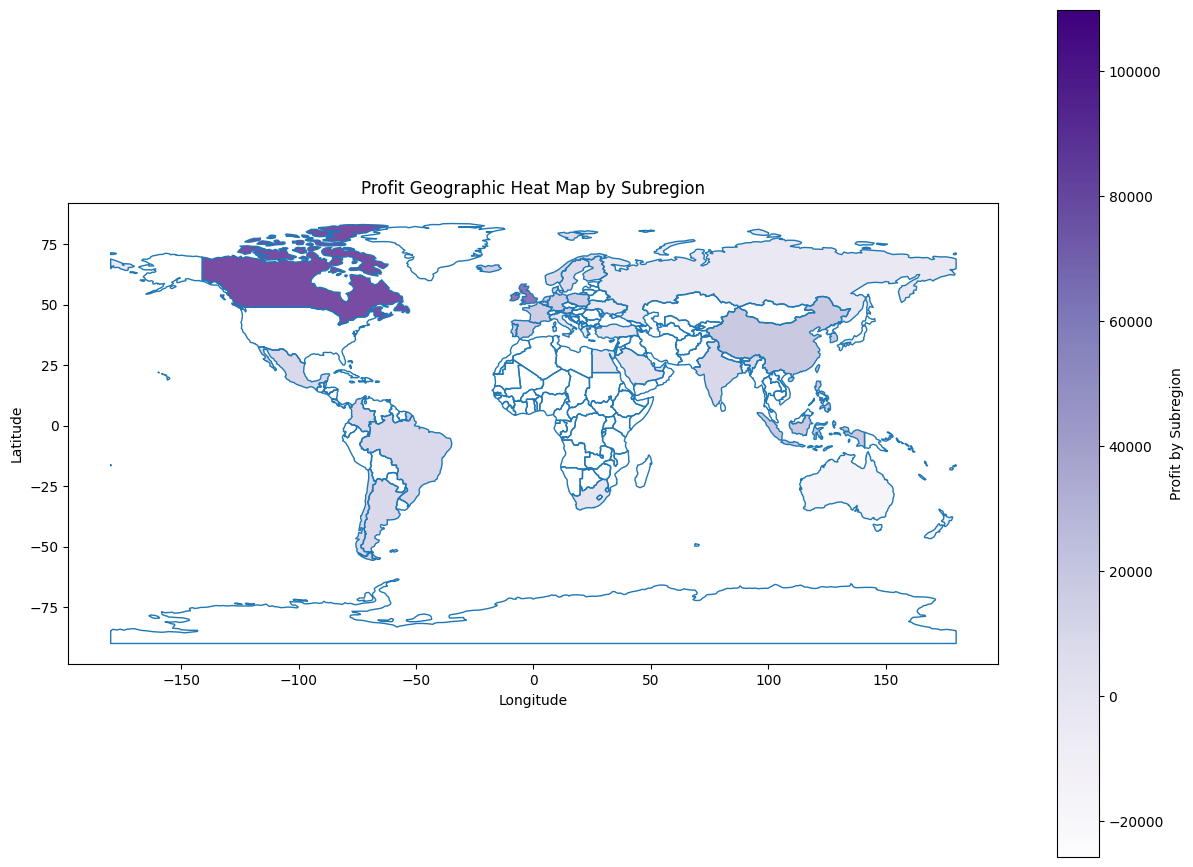

In [465]:

# Subregion to country mapping
subregion_countries = {
    "LATAM": ["Costa Rica", "Brazil", "Chile", "Colombia", "Mexico", "Argentina"],
    "NAMER": ["United States", "Canada"],
    "ANZ": ["Australia", "New Zealand"],
    "APAC": ["Philippines", "Singapore", "South Korea", "China", "Indonesia", "Taiwan"],
    "IND": ["India"],
    "JAPN": ["Japan"],
    "EU": ["Italy"],
    "EU-EAST": ["Russia", "Czech Republic", "Israel", "Ukraine", "Greece"],
    "EU-WEST": ["Germany", "France", "Luxembourg", "Spain", "Portugal", "Belgium", "Netherlands", "Poland", "Austria", "Denmark", "Croatia", "Slovenia", "Iceland"],
    "MEA": ["Turkey", "South Africa", "Saudi Arabia", "United Arab Emirates", "Egypt", "Qatar"],
    "NOR": ["Sweden", "Finland", "Norway"],
    "UKIR": ["Ireland", "United Kingdom"],
}

# Load the shapefile
world = gpd.read_file(r'D:\Masterclass\Purwadhika\Capstone\Module 2\Package\ne_110m_admin_0_countries.shp')

# Filter countries by subregion
gdf = world[world['NAME'].apply(lambda x: any(x in countries for countries in subregion_countries.values()))]

# Add Profit data to GeoDataFrame by mapping countries to their subregion Profit
def get_Profit_by_country(country_name):
    for subregion, countries in subregion_countries.items():
        if country_name in countries:
            # Sum Profit for each subregion
            total_Profit = df[df['Subregion'] == subregion]['Profit'].sum()
            return total_Profit
    return 0

gdf['Profit'] = gdf['NAME'].apply(get_Profit_by_country)

# Plotting
fig, ax = plt.subplots(figsize=(15, 11))
world.boundary.plot(ax=ax, linewidth=1)

# Plot countries with Profit data using Purples colormap
gdf.plot(
    ax=ax,
    column='Profit',
    cmap='Purples',
    legend=True,
    legend_kwds={'label': "Profit by Subregion"},
    alpha=0.7
)

plt.title('Profit Geographic Heat Map by Subregion')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [470]:
# Group by 'Subregion' and sum the 'Profit' column
subregion_Profit = df.groupby('Subregion')['Profit'].sum().reset_index()

# Sorting
subregion_Profit = subregion_Profit.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Formatting the Profit value
subregion_Profit['Profit'] = subregion_Profit['Profit'].apply(lambda x: f"${x:,.2f}")

subregion_Profit

,Subregion,Profit
0,NAMER,"$109,784.04"
1,UKIR,"$85,238.25"
2,APAC,"$30,311.18"
3,EU-WEST,"$26,706.60"
4,IND,"$18,382.94"
5,LATAM,"$17,642.95"
6,NOR,"$16,044.76"
7,EU,"$8,401.80"
8,MEA,"$7,200.15"
9,EU-EAST,"$3,864.49"


In [471]:
# Group by 'Country' and aggregate 'Profit' and 'Subregion'
country_Profit = df.groupby('Country').agg({
    'Profit': 'sum',
    'Subregion': lambda x: ', '.join(sorted(set(x)))  # Join unique subregions as a comma-separated string
}).reset_index()

# Sort the resulting DataFrame by 'Profit' in descending order
country_Profit_sorted = country_Profit.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Formatting the Profit value
country_Profit_sorted['Profit'] = country_Profit_sorted['Profit'].apply(lambda x: f"${x:,.2f}")

# Display the result
country_Profit_sorted.head(10)


,Country,Profit,Subregion
0,United States,"$76,381.39",NAMER
1,United Kingdom,"$74,989.09",UKIR
2,Canada,"$33,402.65",NAMER
3,Brazil,"$24,463.19",LATAM
4,Spain,"$18,597.95",EU-WEST
5,India,"$18,382.94",IND
6,Finland,"$16,250.04",NOR
7,Luxembourg,"$10,823.19",EU-WEST
8,Ireland,"$10,249.16",UKIR
9,Philippines,"$9,977.37",APAC


In [472]:
country_Profit_sorted.tail(10)

,Country,Profit,Subregion
38,Belgium,"$-1,190.47",EU-WEST
39,Germany,"$-3,399.30",EU-WEST
40,Chile,"$-3,427.92",LATAM
41,South Africa,"$-5,341.69",MEA
42,Russia,"$-6,527.86",EU-EAST
43,Sweden,"$-7,490.91",NOR
44,Australia,"$-12,607.89",ANZ
45,France,"$-15,559.96",EU-WEST
46,Mexico,"$-16,971.38",LATAM
47,Japan,"$-25,729.36",JAPN


# THE END